# Предсказание покупки и анализ данных

## Содержание

<br> 1) **_[Загрузка библиотек, загрузка данных и их предобработка](#preps)_**

<br> 2) **_[Анализ данных на валидность](#validation)_**
<br>  2.1.) **_[Проверка данных](#check)_**
<br> 2.2.) **_[Удаление лишних строк из датасета](#del)_**

<br> 3) **_[Анализ данных в датасете](#analysis)_**
<br> 3.1.) **_[Распределения признаков](#criteriadist)_**
<br> 3.2.) **_[Анализ данных](#data_analysis)_**

<br> 4) **_[Корреляция признаков](#correlation)_**

<br> 5) **_[Убираем выбросы](#outlier)_**

<br> 6) **_[OverSampler](#oversampler)_**

<br> 7) **_[Обучение моделей](#ML)_**
<br> 7.1.) **_[Logistic Regression](#LR)_**
<br> 7.2.) **_[Decision Tree Classifier](#dtc)_**

<br> 8) **_[Выводы и основные конверсии](#summary)_**
<br> 9) **_[Комментарии](#comments)_**

### **_Загрузка библиотек, загрузка данных и их предобработка_** <a id = "preps"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

import warnings

warnings.filterwarnings('ignore')

In [2]:
dt = pd.read_csv("total_data.csv")

In [3]:
dt.head(3)

,request_id,age,spoke_with_agent,documents_send,documents_recieved,flag,delivery_pickup,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
0,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,not_stated,0.0,1.0,1,0,0,0,0,new
1,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,delivery,171.0,0.0,1,0,1,0,0,old
2,7ae319b1bd27ca5eaf622a9421a3014d,31,1,0,0,0,pickup,40.0,0.0,1,0,0,0,0,new


### Описание признаков
<br>●	request_id - id заявки на сайте на создание мебели
<br>●	age - возраст клиента
<br>●	spoke_with_agent - говорил ли пользователь с оператором
<br>●	documents_send - клиент отправил дополнительные данные после того, как отправил завяку с сайта
<br>●	documents_recieved - одна из наших мастерских получила эти сведения
<br>●	delivery_pickup - тип доставки, указанной при заявке на сайте
<br>●	session_duration - длительность сессии в секундах
<br>●	bounce_rate - доля “некачественных” сессий на сайте у пользователя
<br>●	sessions - суммарное количество сессий пользователя для конкретной заявки
<br>●	visited_partners - посещал сайты партнеров
<br>●	step_1, step_2, step_3 - дошел до 1-го, 2-го, 3-го этапа заполнения заявки на сайте
<br>●	user_type - тип пользователя (старый, новый)
<br>●	`flag` - совершил ли пользователь покупку (целевая переменная)


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   request_id          8471 non-null   object 
 1   age                 8471 non-null   int64  
 2   spoke_with_agent    8471 non-null   int64  
 3   documents_send      8471 non-null   int64  
 4   documents_recieved  8471 non-null   int64  
 5   flag                8471 non-null   int64  
 6   delivery_pickup     8471 non-null   object 
 7   session_duration    8471 non-null   float64
 8   bounce_rate         8471 non-null   float64
 9   sessions            8471 non-null   int64  
 10  visited_partners    8471 non-null   int64  
 11  step_1              8471 non-null   int64  
 12  step_2              8471 non-null   int64  
 13  step_3              8471 non-null   int64  
 14  user_type           8471 non-null   object 
dtypes: float64(2), int64(10), object(3)
memory usage: 992.8

In [5]:
dt.describe()

,age,spoke_with_agent,documents_send,documents_recieved,flag,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3
count,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000
mean,32.738992,0.648566,0.212017,0.080274,0.080864,262.230814,0.085194,1.214615,0.028686,0.841341,0.065163,0.237162
std,9.429812,0.477446,0.408761,0.271733,0.272642,314.366181,0.265456,0.600259,0.166933,0.746718,0.247784,0.429511
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,78.166667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,0.000000,158.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,38.000000,1.000000,0.000000,0.000000,0.000000,323.200000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,83.000000,1.000000,1.000000,1.000000,1.000000,3364.000000,1.000000,14.000000,1.000000,6.000000,2.000000,3.000000


> **_Два параметра следует перевести в формат чисел. Это параметры: user_type & delivery_pickup. Буду преобразовывать с помощью get_dummies(), чтобы не было непреднамеренного присвоения уровня, а только фиксировался параметр_**

In [6]:
dt = pd.concat([dt, pd.get_dummies(dt['user_type'])], axis=1)

In [7]:
dt = pd.concat([dt, pd.get_dummies(dt['delivery_pickup'])], axis=1)

In [8]:
dt.drop(['user_type', 'delivery_pickup'], axis = 1, inplace = True)
dt

,request_id,age,spoke_with_agent,documents_send,documents_recieved,flag,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,new,old,delivery,not_stated,pickup
0,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,0.0,1.0,1,0,0,0,0,1,0,0,1,0
1,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,171.0,0.0,1,0,1,0,0,0,1,1,0,0
2,7ae319b1bd27ca5eaf622a9421a3014d,31,1,0,0,0,40.0,0.0,1,0,0,0,0,1,0,0,0,1
3,06993ceab2ede613bce365880572460c,23,1,0,0,0,229.0,0.0,2,1,2,0,0,1,0,0,0,1
4,d9bf61f493e7e37df134a2e1284ccd00,29,1,0,0,0,152.0,0.0,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8466,f8652cdd7c3d5f702f5c9286ea94ada2,51,0,1,1,1,156.0,0.0,2,0,2,0,0,1,0,0,0,1
8467,3b9b7dd2634675fe639415d14e281d3c,35,1,1,1,1,241.0,0.0,1,0,1,0,0,1,0,1,0,0
8468,0511b6f39bb220aaced1d5be9303b554,66,1,1,1,1,236.0,0.0,1,0,1,0,1,1,0,0,0,1
8469,6b882de4de48b0af7e541b1da2bb0a46,41,1,1,1,1,127.0,0.0,1,0,0,0,0,1,0,0,0,1


In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   request_id          8471 non-null   object 
 1   age                 8471 non-null   int64  
 2   spoke_with_agent    8471 non-null   int64  
 3   documents_send      8471 non-null   int64  
 4   documents_recieved  8471 non-null   int64  
 5   flag                8471 non-null   int64  
 6   session_duration    8471 non-null   float64
 7   bounce_rate         8471 non-null   float64
 8   sessions            8471 non-null   int64  
 9   visited_partners    8471 non-null   int64  
 10  step_1              8471 non-null   int64  
 11  step_2              8471 non-null   int64  
 12  step_3              8471 non-null   int64  
 13  new                 8471 non-null   uint8  
 14  old                 8471 non-null   uint8  
 15  delivery            8471 non-null   uint8  
 16  not_st

<AxesSubplot:>

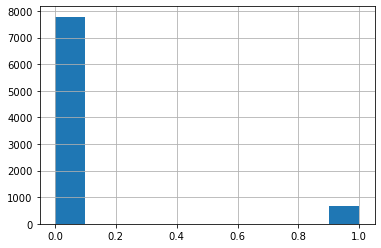

In [10]:
dt.flag.hist()

> **_ЦП несбалансирована. Буду использовать Over // Undersampling_. Эту операцию выполню перед обучением модели. на графике выше ЦП из неочищенного датасета**

## **_Анализ данных на валидность_** <a id="validation"></a>

### **_Проверка данных_**<a id="check"></a>

In [11]:
dt['request_id'].nunique()

7405

### **ID заявок дублируются. Поиск причин**

In [12]:
dt.groupby(['sessions']).count()['request_id']

sessions
1     7141
2     1007
3      228
4       58
5       21
6       11
7        2
8        1
11       1
14       1
Name: request_id, dtype: int64

In [13]:
dt.groupby(['request_id'])['sessions'].unique()

request_id
0007096c881ae4bc5ab17469aaba6aaf       [1]
000a4fbb6ab4c9a3997072af0dee1a2e       [1]
001681c4aafd18924359bb1ebd7d881a       [1]
0016c5ef4773e1d271b295a408666f9a       [1]
0032e36bee1983138ad4e977000ccd35       [1]
                                     ...  
ffd403e5b2b68d329354bc0bc7ae945f    [1, 2]
ffe0229a6d2f1f246c86a4a6474b960d       [1]
ffe92c3866b103914183608ca8f0b5a9       [1]
fff1494fa3b0f523dfa6a3bb3dff0b76       [1]
fffd7e46223aaef018fb35345d8cb0d3       [1]
Name: sessions, Length: 7405, dtype: object

In [14]:
dt.groupby(['request_id'])['bounce_rate'].unique()

request_id
0007096c881ae4bc5ab17469aaba6aaf    [1.0, 0.0]
000a4fbb6ab4c9a3997072af0dee1a2e         [0.0]
001681c4aafd18924359bb1ebd7d881a         [0.0]
0016c5ef4773e1d271b295a408666f9a         [0.0]
0032e36bee1983138ad4e977000ccd35         [0.0]
                                       ...    
ffd403e5b2b68d329354bc0bc7ae945f    [1.0, 0.0]
ffe0229a6d2f1f246c86a4a6474b960d         [0.0]
ffe92c3866b103914183608ca8f0b5a9         [0.0]
fff1494fa3b0f523dfa6a3bb3dff0b76         [0.0]
fffd7e46223aaef018fb35345d8cb0d3         [0.0]
Name: bounce_rate, Length: 7405, dtype: object

In [15]:
dt.groupby(['request_id'])['step_1'].unique()

request_id
0007096c881ae4bc5ab17469aaba6aaf    [0, 1]
000a4fbb6ab4c9a3997072af0dee1a2e       [0]
001681c4aafd18924359bb1ebd7d881a       [1]
0016c5ef4773e1d271b295a408666f9a       [1]
0032e36bee1983138ad4e977000ccd35       [1]
                                     ...  
ffd403e5b2b68d329354bc0bc7ae945f    [0, 2]
ffe0229a6d2f1f246c86a4a6474b960d       [1]
ffe92c3866b103914183608ca8f0b5a9       [0]
fff1494fa3b0f523dfa6a3bb3dff0b76       [1]
fffd7e46223aaef018fb35345d8cb0d3       [1]
Name: step_1, Length: 7405, dtype: object

In [16]:
list_new = dt[dt['new']==1]
list_old = dt[dt['old']==1]
list_unknown = dt[(dt['new'] ==0)&(dt['old']==0)]

In [17]:
new_id = list_new['request_id'].values.tolist()
old_id = list_old['request_id'].values.tolist()

In [18]:
list_dupl = list([i for i in new_id if i in old_id])

In [19]:
pd.DataFrame(list_dupl).nunique()

0    939
dtype: int64

**_`Причины:` в датасете request_id дублируются, т.к. для одного и того же request_id встречаются несколько значений Bounce_rate, sessions, step_1, статус old // new, проч..  Несколько странным кажется значение 2 в параметре step_1. Т.е. пользователь дважды прошел шаг1. Также важно понять почему у пользователей (запросов) может быть двойной статус - старый и новый одновременно._**

## **_Удаление лишних строк из датасета_** <a id="del"></a>

**Решила убрать из датасета данные с задвоенным (противоречивым) статусом: старый и новый одновременно**

In [20]:
filtered_df = dt[~dt['request_id'].isin(list_dupl)]

In [21]:
filtered_df

,request_id,age,spoke_with_agent,documents_send,documents_recieved,flag,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,new,old,delivery,not_stated,pickup
2,7ae319b1bd27ca5eaf622a9421a3014d,31,1,0,0,0,40.0,0.0,1,0,0,0,0,1,0,0,0,1
3,06993ceab2ede613bce365880572460c,23,1,0,0,0,229.0,0.0,2,1,2,0,0,1,0,0,0,1
6,90dd7c50afd37c89497a97237da2c97e,25,0,0,0,0,76.0,0.0,1,0,1,0,0,1,0,1,0,0
7,3a3398194ec00a6d7245004c9720ae0f,33,1,0,0,0,184.0,0.0,1,0,1,0,0,1,0,0,0,1
8,ceaa15fdfb170dd7b5eadb4c0166a799,20,0,0,0,0,127.0,0.0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8466,f8652cdd7c3d5f702f5c9286ea94ada2,51,0,1,1,1,156.0,0.0,2,0,2,0,0,1,0,0,0,1
8467,3b9b7dd2634675fe639415d14e281d3c,35,1,1,1,1,241.0,0.0,1,0,1,0,0,1,0,1,0,0
8468,0511b6f39bb220aaced1d5be9303b554,66,1,1,1,1,236.0,0.0,1,0,1,0,1,1,0,0,0,1
8469,6b882de4de48b0af7e541b1da2bb0a46,41,1,1,1,1,127.0,0.0,1,0,0,0,0,1,0,0,0,1


In [22]:
filtered_df['request_id'].value_counts()

8f2b5a71267b24454a7af8e679ea3e61    3
b958c384141f42020ef5ca17b5921000    2
a95dd118ab574ae6ba878384c573ef3f    2
1c9706673b6ba540e02983342759cc34    2
6420d16812df02b2706102217774a631    2
                                   ..
2a1816c337109a4d91490928c9d93e16    1
ed5bd0c3176d108ca5022f63b9a5a4a7    1
e2bdf873f1dad843b8714a78f25ef19a    1
6869d152df93b558095a4bf65ec92222    1
beab3517df1061e7b32bb33822451291    1
Name: request_id, Length: 6466, dtype: int64

## **_Анализ данных в датасете_** <a id = "analysis"></a>

## **_Распределения признаков_** <a id="criteriadist"></a>


**_Целевая переменная после удаления записей с противрочивыми статусами Old / New_**

<AxesSubplot:>

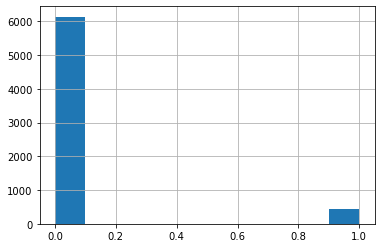

In [23]:
filtered_df.flag.hist()

>> ЦП несбалансированная

**_Распределение пользователей по той хар-ке, которая есть по ним - Возраст._**

<AxesSubplot:xlabel='age'>

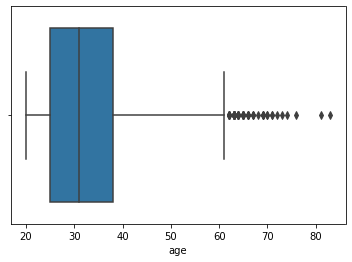

In [24]:
sns.boxplot(filtered_df['age'], width=0.8, whis=1.8)

>> Есть выбросы. Далее перед обучением модели данные будут очищены от выбросов.

**_Распределение остальных параметров:_**

In [25]:
dtred = filtered_df.drop(['request_id'], axis = 1)

In [26]:
list1 = dtred.columns.tolist()

In [27]:
list1

['age',
 'spoke_with_agent',
 'documents_send',
 'documents_recieved',
 'flag',
 'session_duration',
 'bounce_rate',
 'sessions',
 'visited_partners',
 'step_1',
 'step_2',
 'step_3',
 'new',
 'old',
 'delivery',
 'not_stated',
 'pickup']

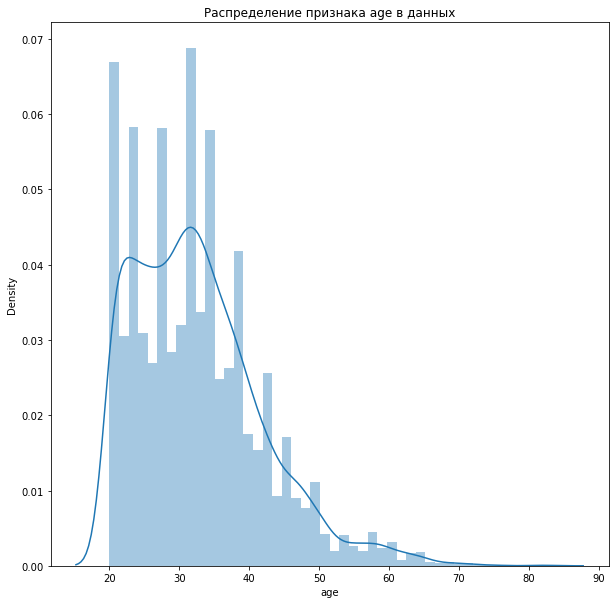

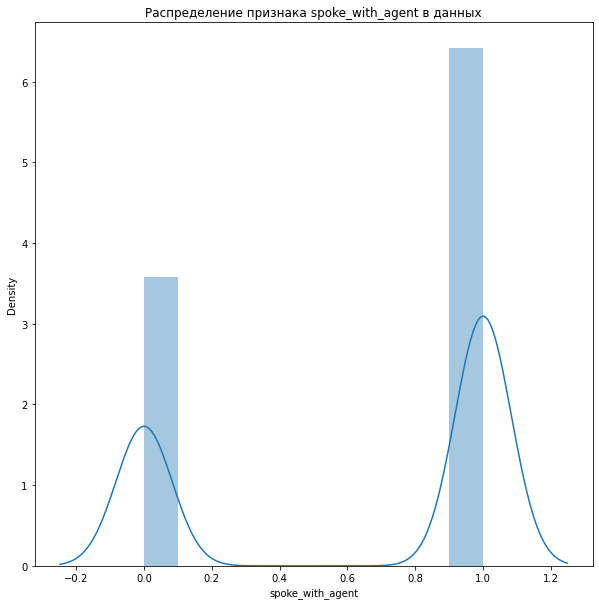

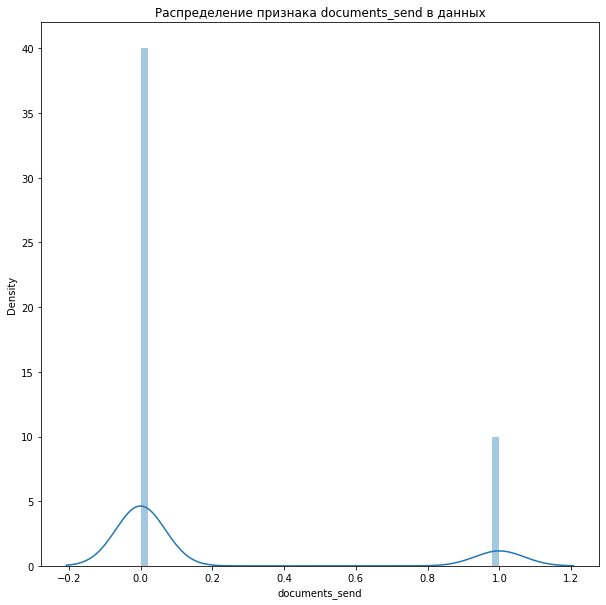

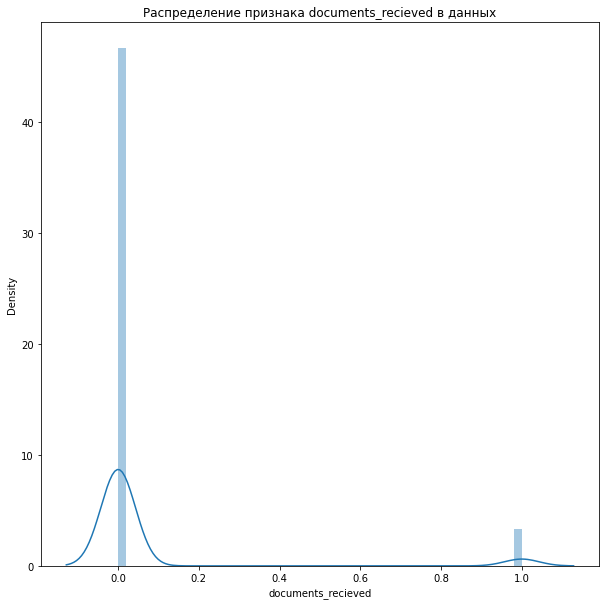

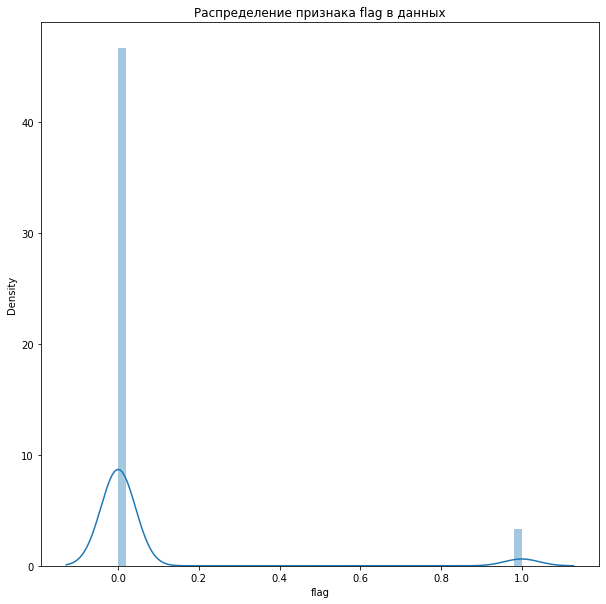

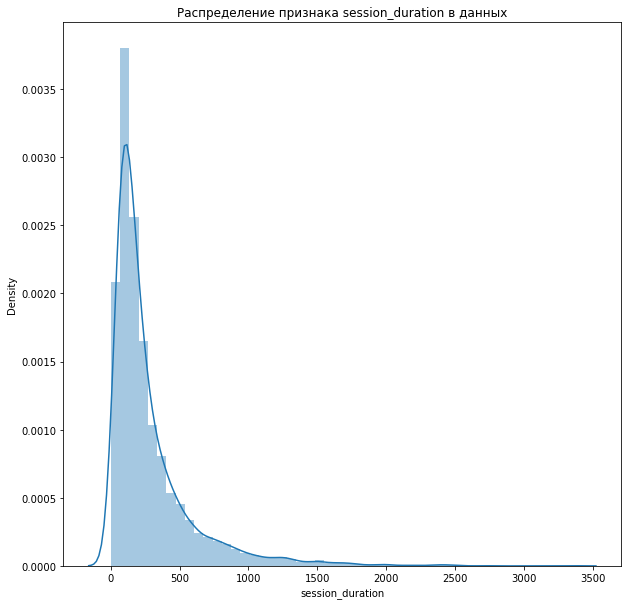

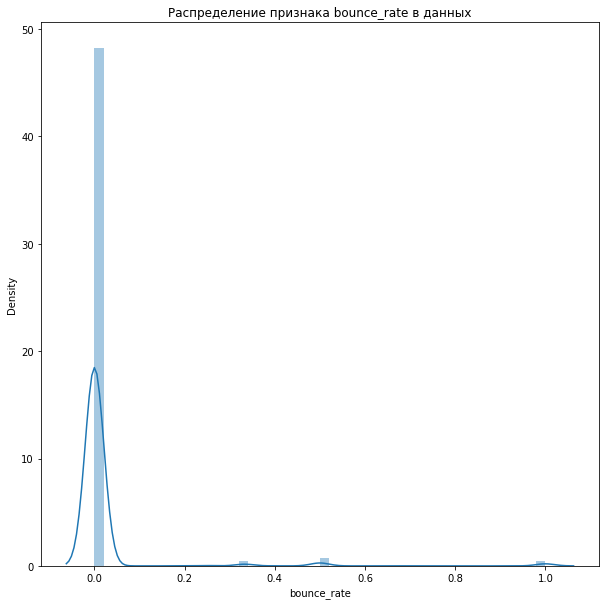

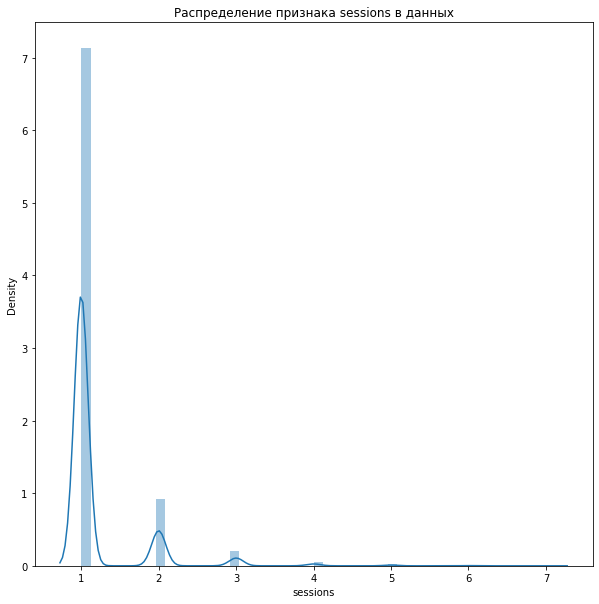

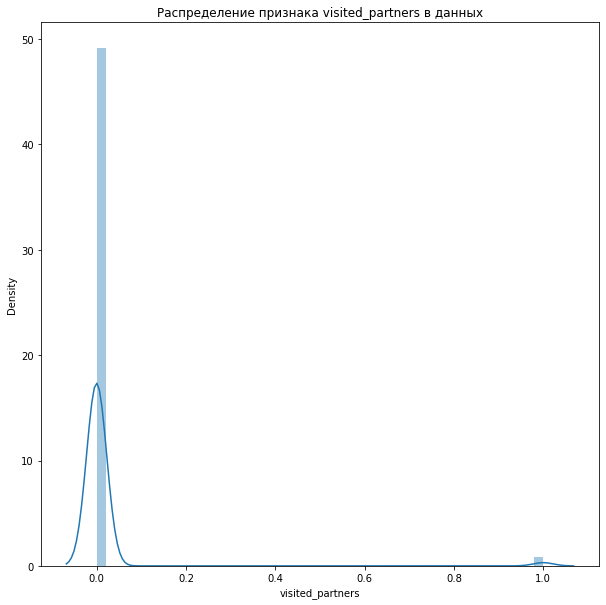

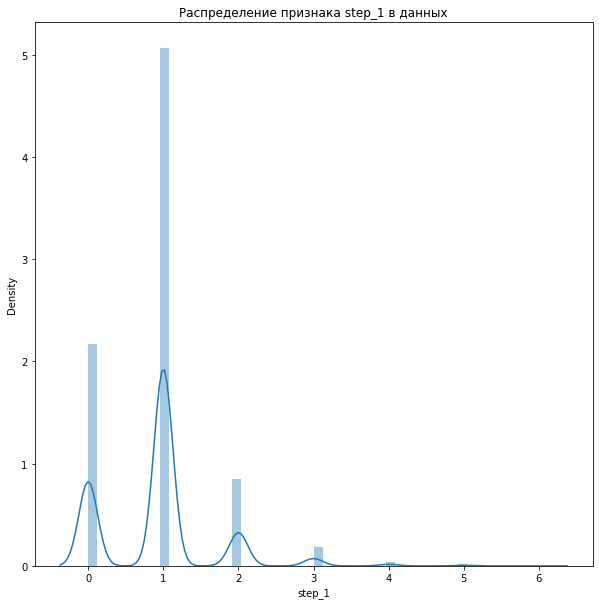

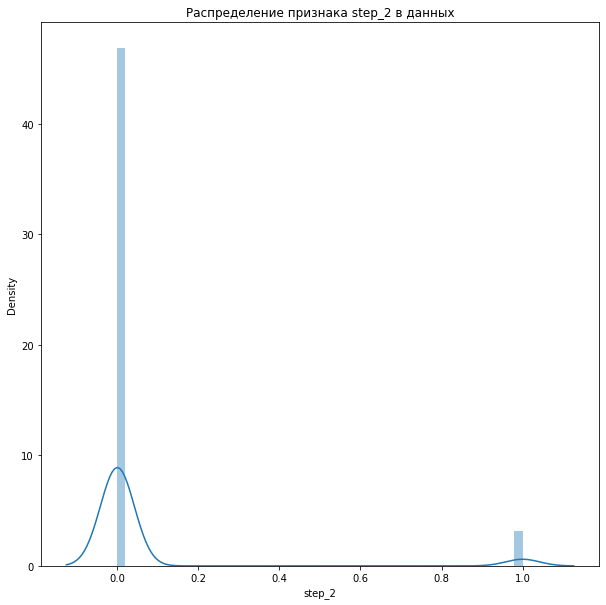

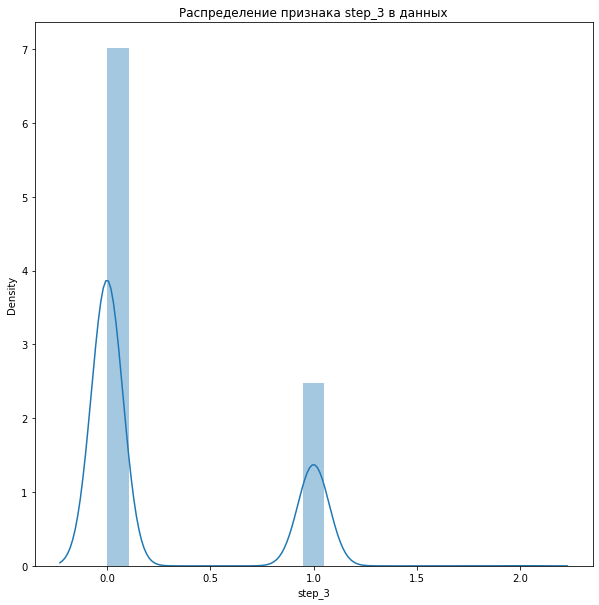

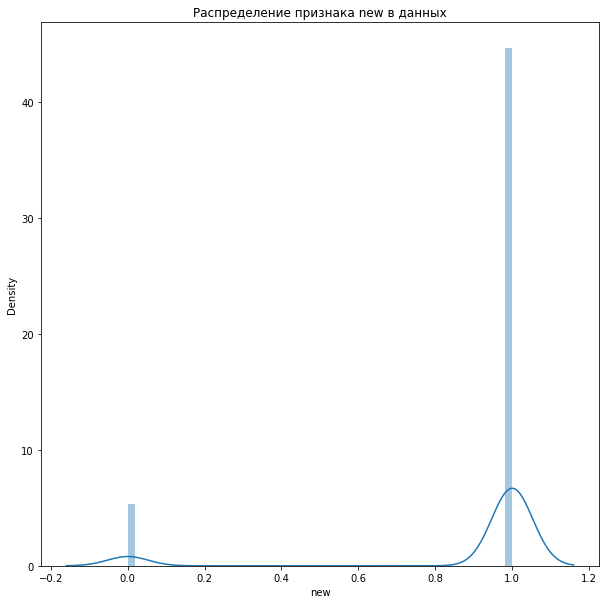

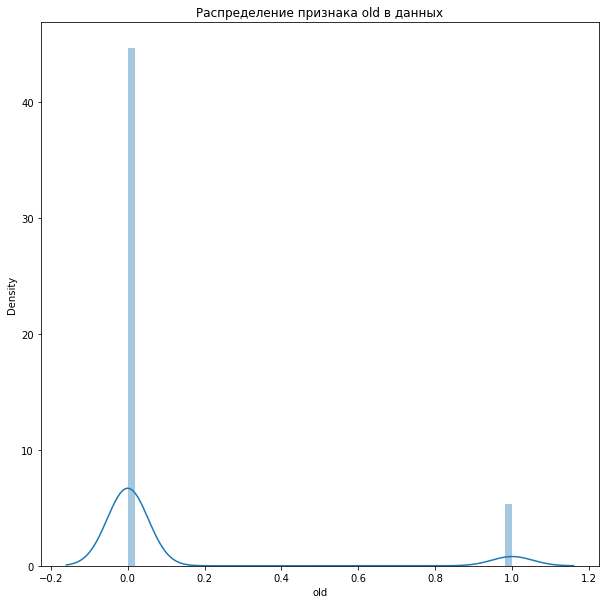

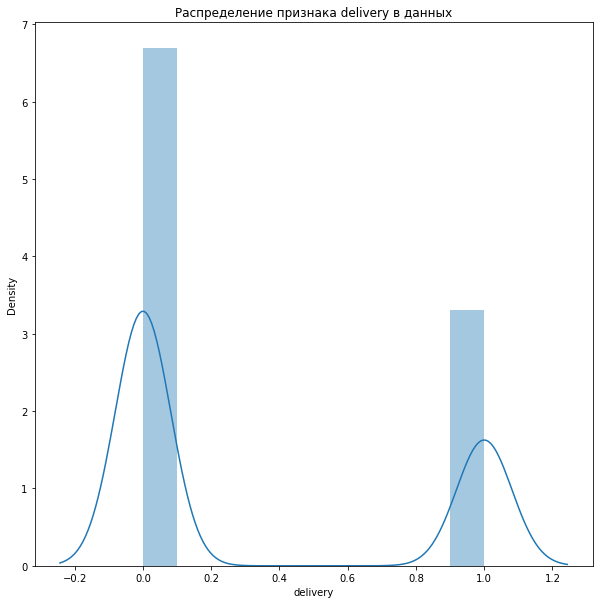

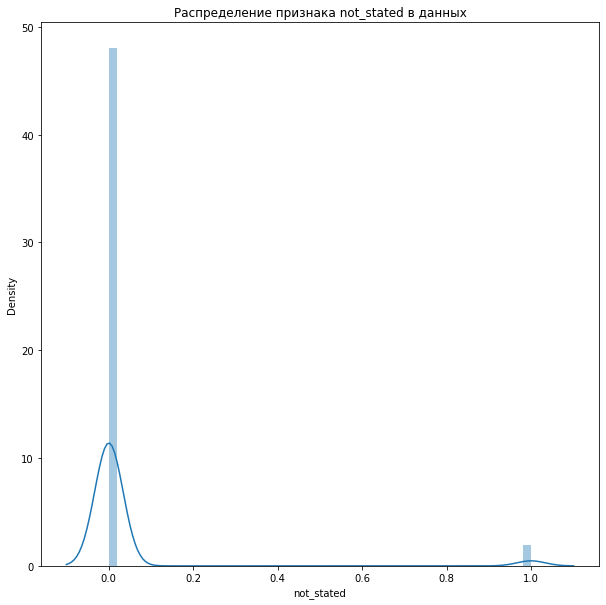

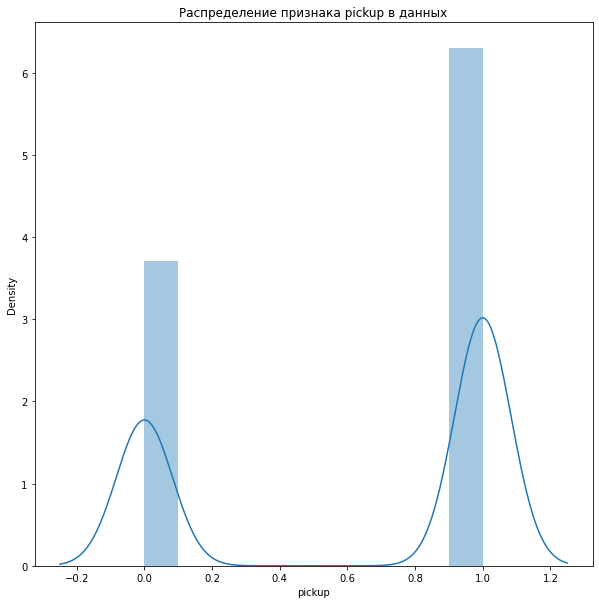

In [28]:
for col in list1:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в данных')
    sns.distplot(dtred[col]);

## **_Сравнение Купивших с Некупившими_**

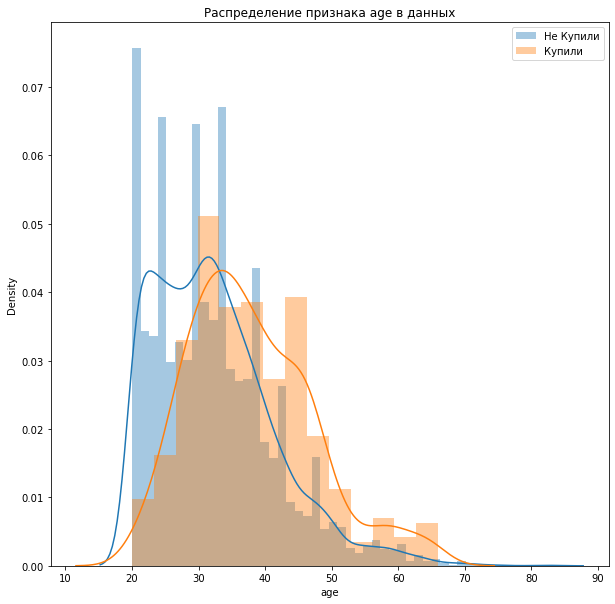

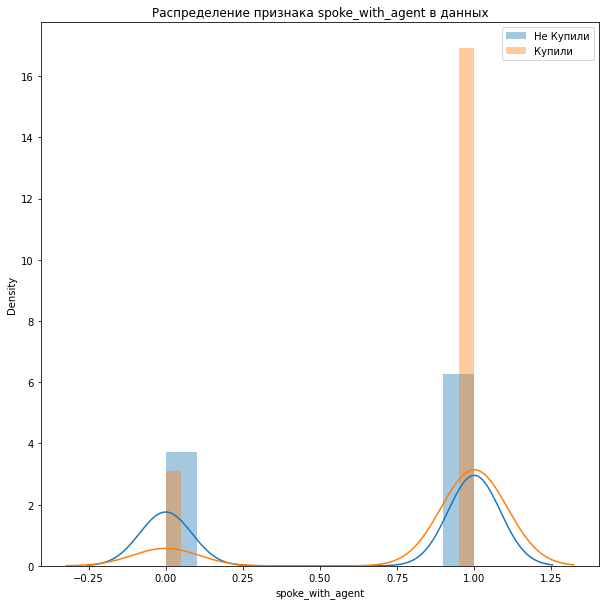

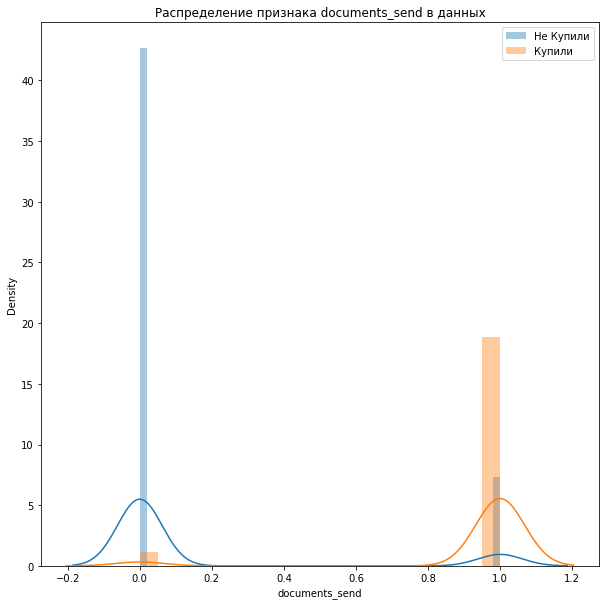

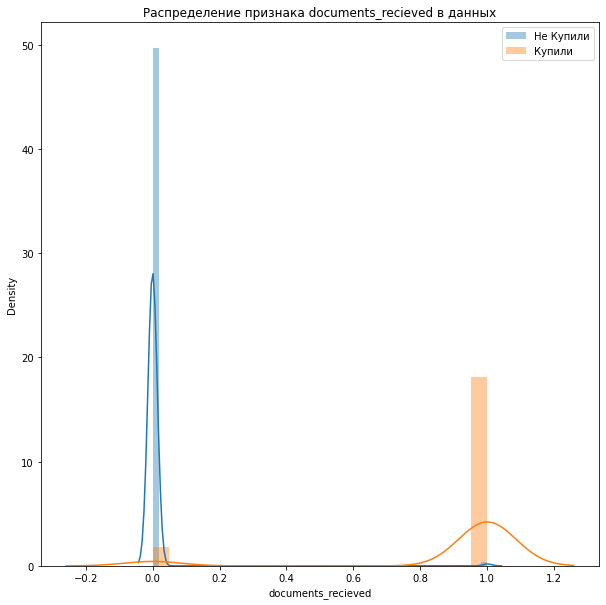

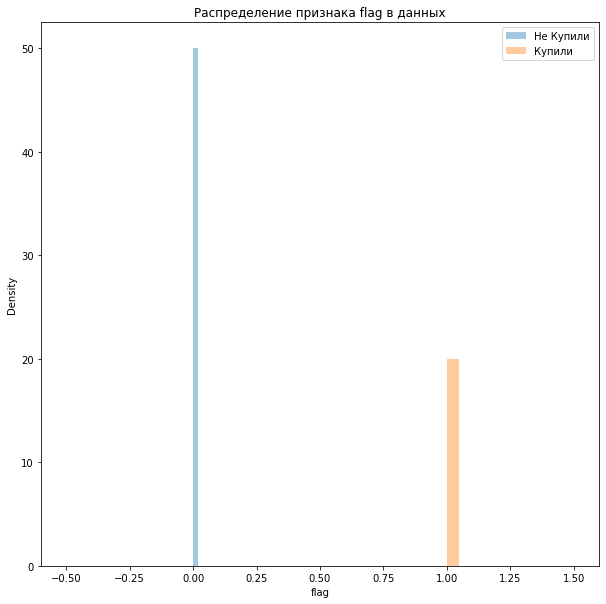

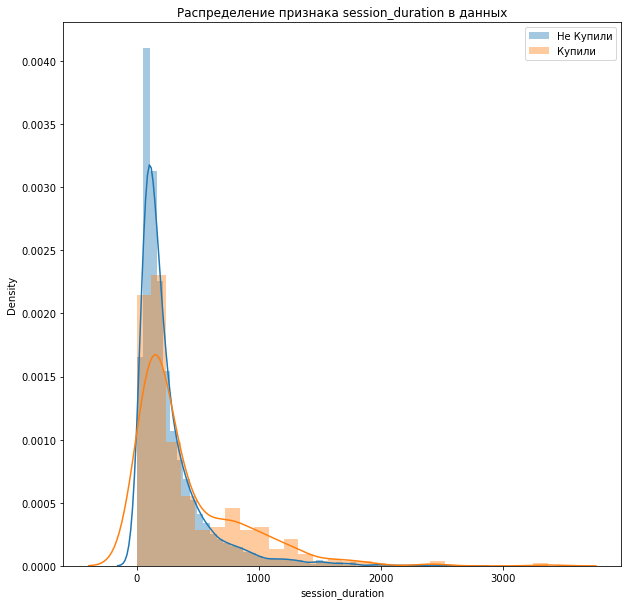

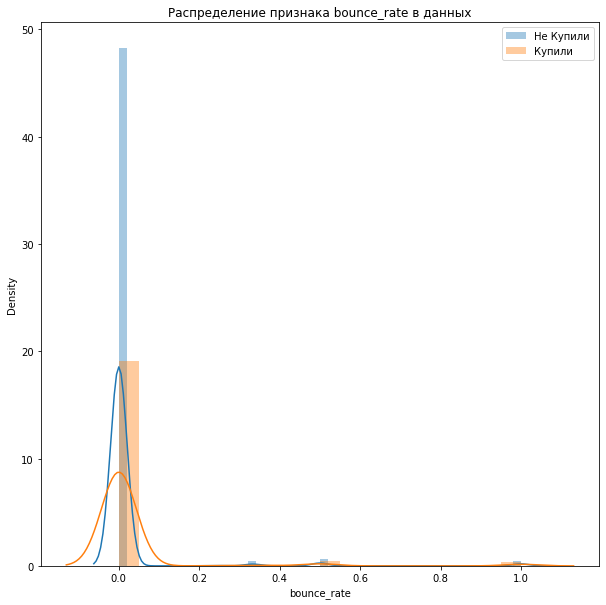

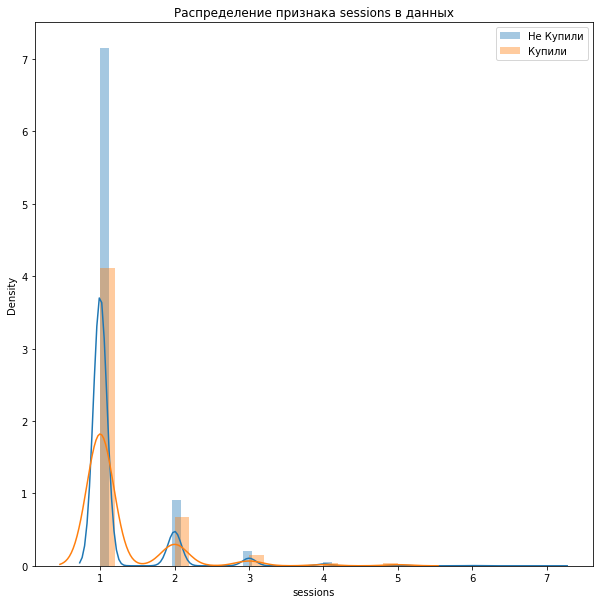

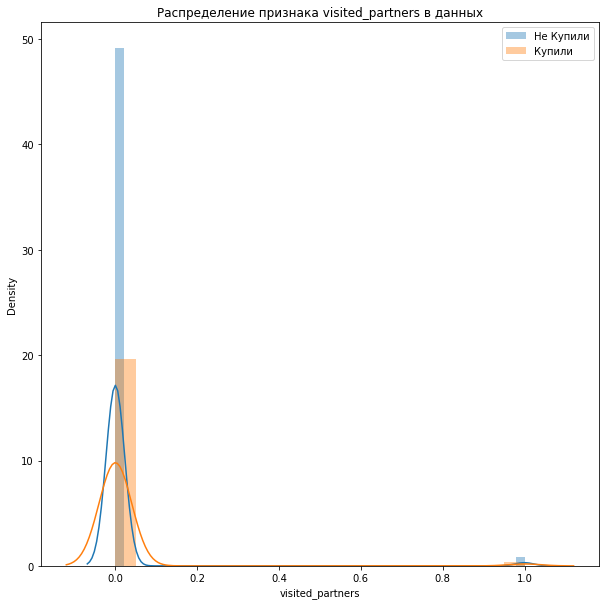

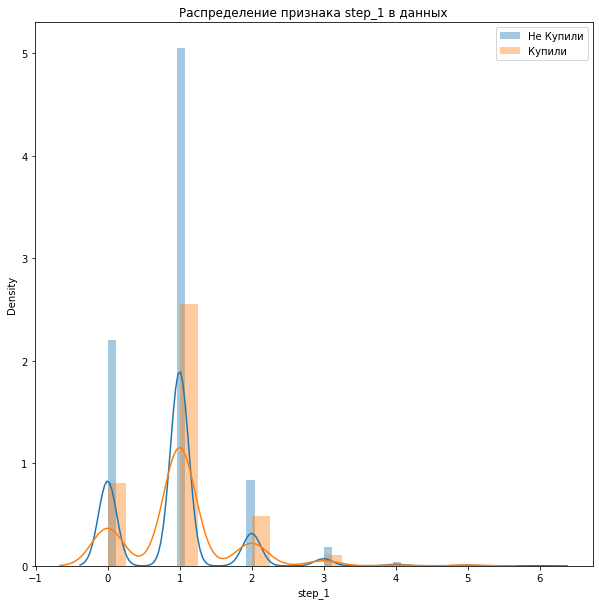

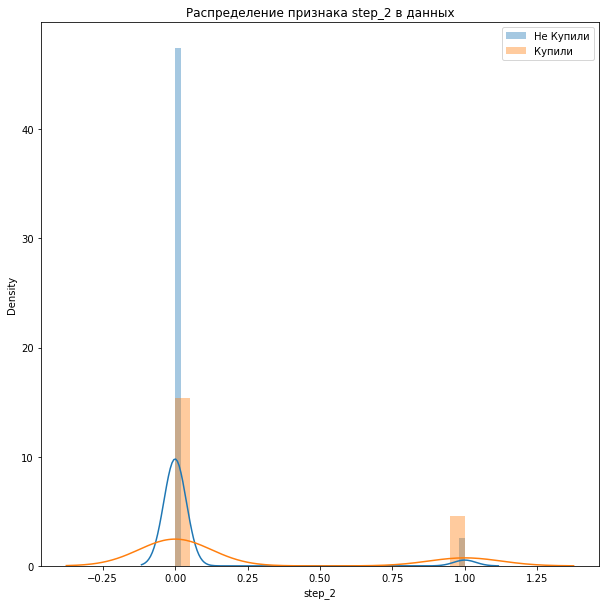

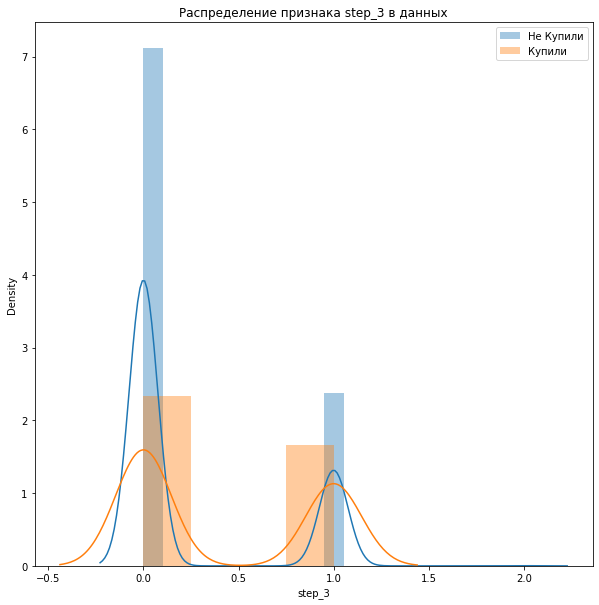

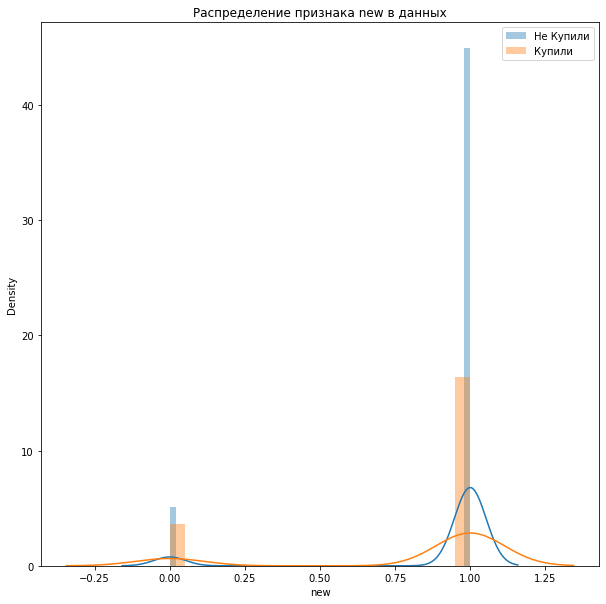

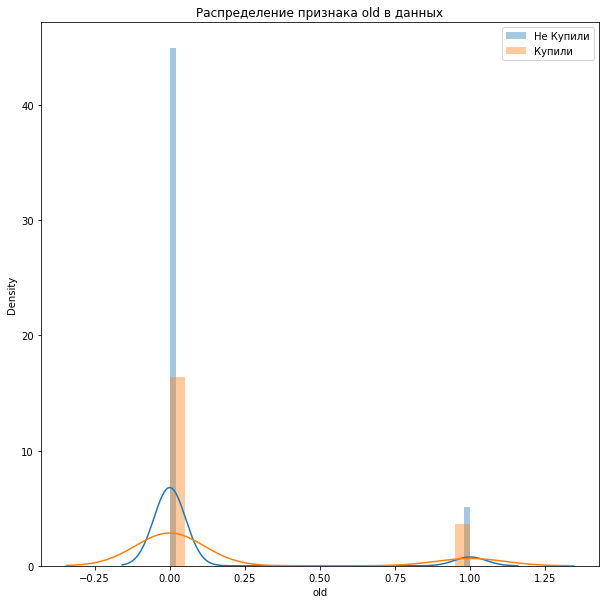

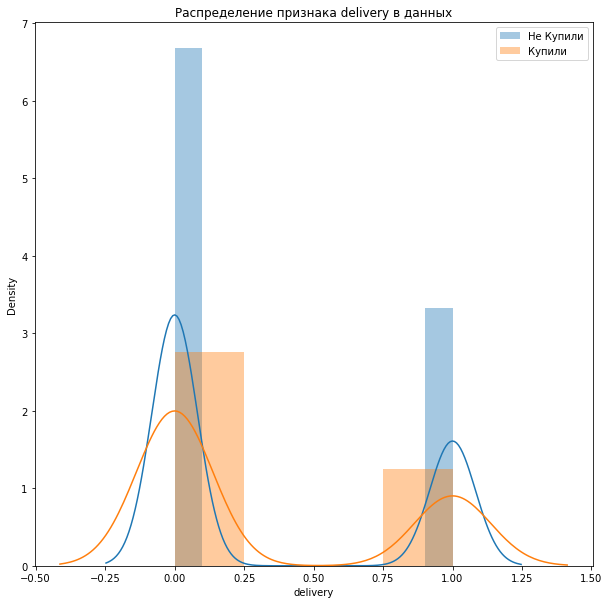

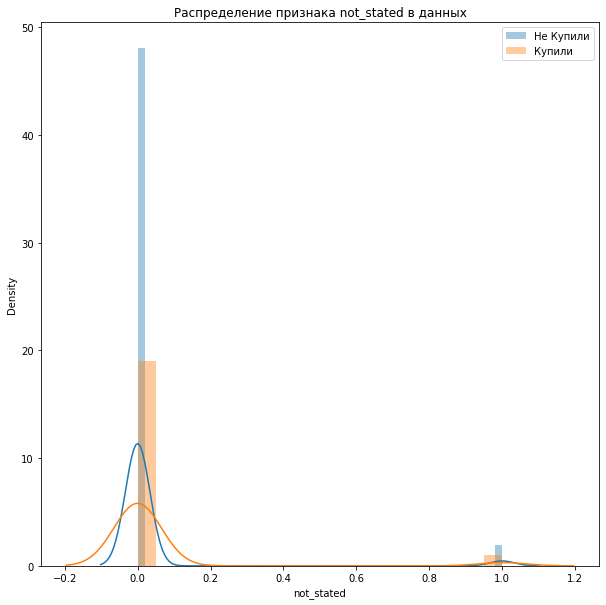

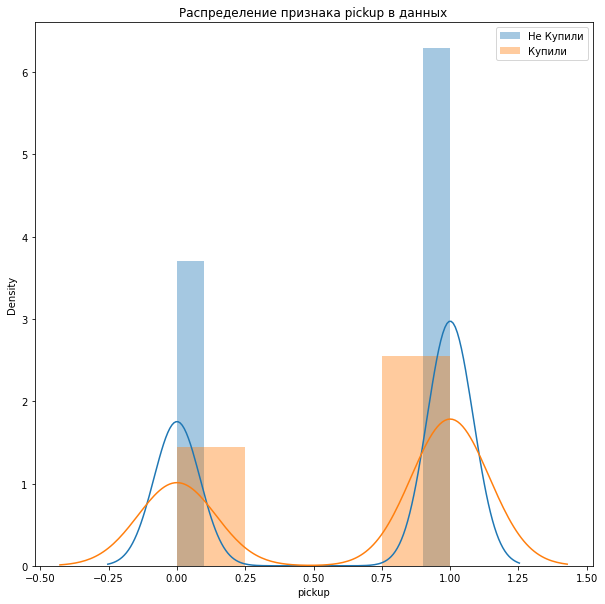

In [29]:
Flag_0 = dtred[dtred['flag'] == 0]
Flag_1 = dtred[dtred['flag'] == 1]


for col in list1:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в данных')
    sns.distplot(Flag_0[col], label = 'Не Купили')
    sns.distplot(Flag_1[col], label = 'Купили')   
    plt.legend()

## **_Анализ данных_** <a id="data_analysis"></a>

### **Кол-во сессий по возрастам пользователей**

In [30]:
dtage=pd.DataFrame(filtered_df.groupby([filtered_df.age])['sessions'].sum()).sort_values(by = 'sessions', ascending = False)

In [31]:
dtage.head(10)

,sessions
age,
31,373
33,366
32,360
21,346
30,343
20,341
27,332
25,327
22,323


In [32]:
print('Максимальное кол-во сессий:', dtage[dtage['sessions'] == np.max(dtage['sessions'])])

Максимальное кол-во сессий:      sessions
age          
31        373


In [33]:
dtage['sessions'] = dtage['sessions'].astype(int)

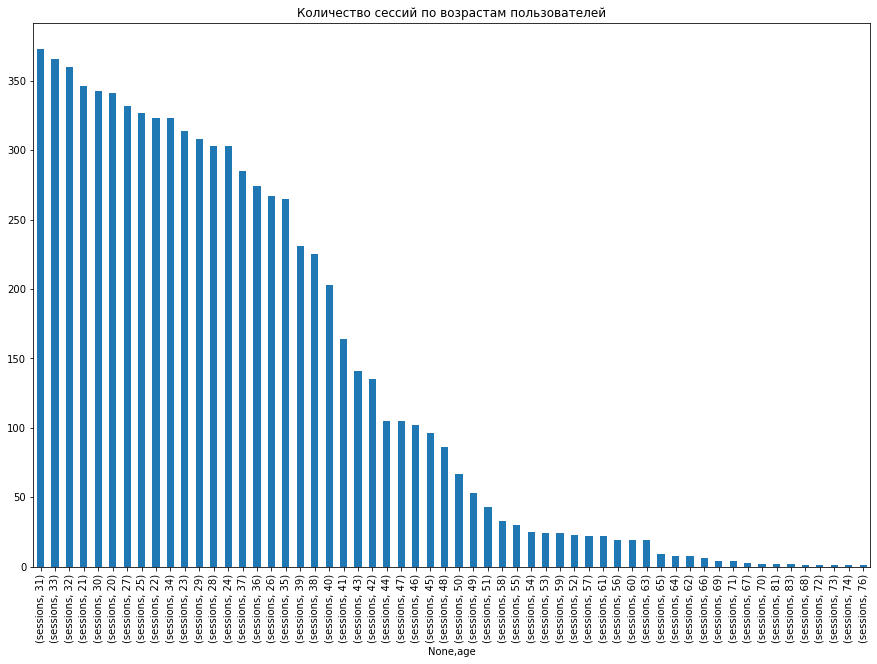

In [34]:
dtage.unstack().plot.bar(y='sessions', title='Количество сессий по возрастам пользователей', rot=90, figsize = (15,10));

> **_Больше всего сессий (кол-во) у пользователей возврастной группы от 20 до 36 лет_**

### **Продолжительность сессий по возрастам пользователей**

In [35]:
dtage1=pd.DataFrame(filtered_df.groupby([filtered_df.age])['session_duration'].
                    mean()).sort_values(by = 'session_duration', ascending = False)
dtage1.rename(columns = {'session_duration': 'AVG_session_duration'}, inplace = True)
dtage1['sessions_Qty'] = filtered_df.groupby(['age'])['sessions'].sum()
dtage1.head(10)

,AVG_session_duration,sessions_Qty
age,,
74,1788.000000,1
81,1086.000000,2
69,784.000000,4
62,471.928571,8
68,438.000000,1
73,424.000000,1
48,369.958937,86
47,356.944444,105
50,356.862500,67


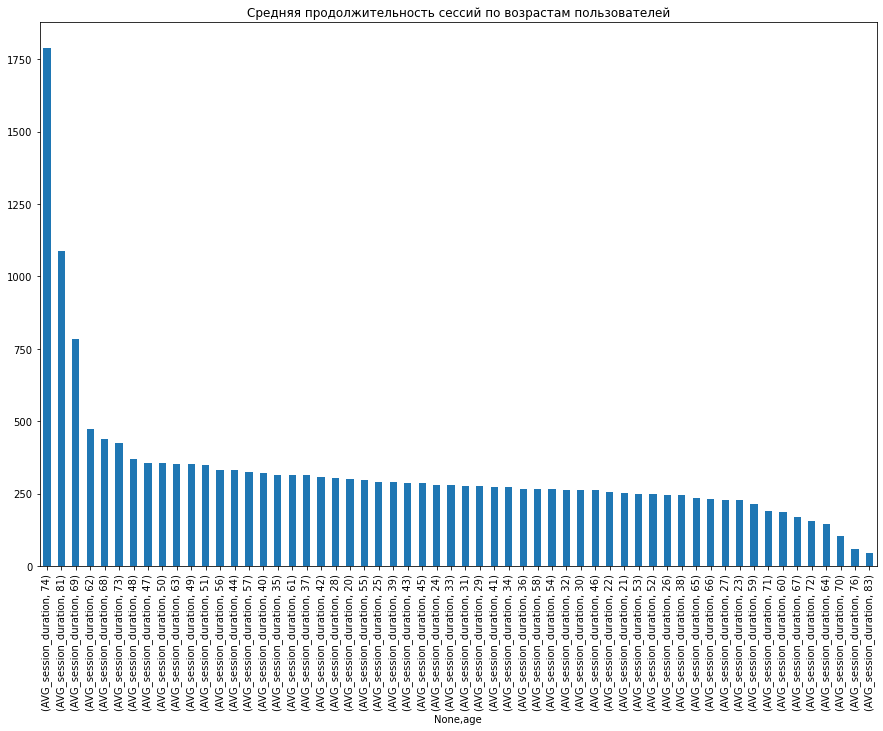

In [36]:
dtage1[['AVG_session_duration']].unstack().plot.bar(y='AVG_session_duration', 
                                               title='Средняя продолжительность сессий по возрастам пользователей', 
                                                    rot=90, figsize = (15,10));

> **_Средняя продолжительность сессий примерно в одном диапазоне (примерно до 320 сек.). Есть выбросы (значительно выше или ниже среднего значения). Они наблюдаются в основном в вовзрастных группах пользователей от 60 лет. Возможно, на сайте мелкий шрифт, не достаточно увеличиваются фото товара, т.д._**

### **Кол-во размещенных заявок по возрастам пользователей**

In [37]:
filtered_df.groupby([dt.age])['request_id'].count().sort_values(ascending = False).head(10)

age
31    324
33    304
21    302
20    300
32    295
30    288
34    278
25    278
22    275
23    270
Name: request_id, dtype: int64

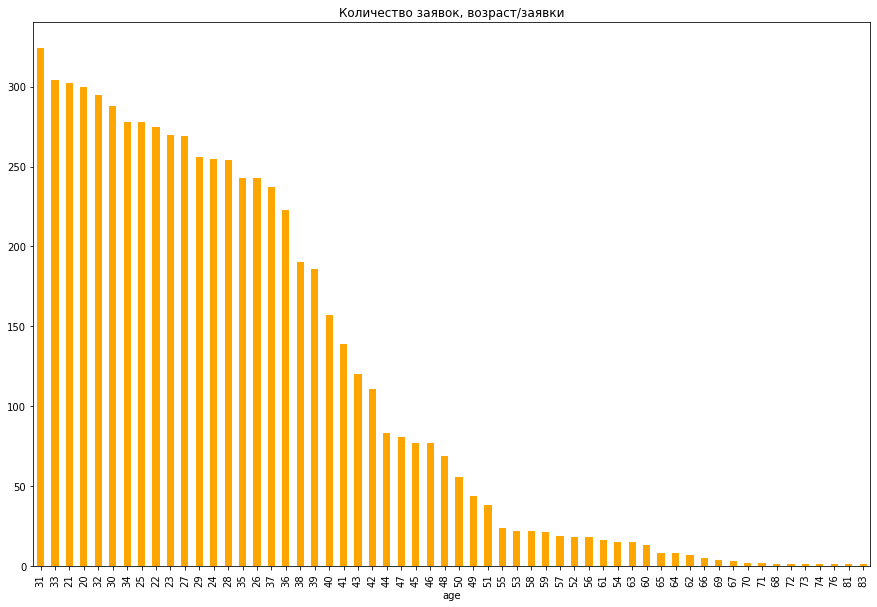

In [38]:
filtered_df.groupby([filtered_df.age])['request_id'].count().sort_values(ascending = False).plot.bar(y='age', 
                                title='Количество заявок, возраст/заявки',color = 'orange', figsize = (15,10));

> **_Больше всего размещенных заявок приходится на пользователей в возрасте от 20 до 40 лет_**

### **Кол-во покупок по возрастам пользователей**

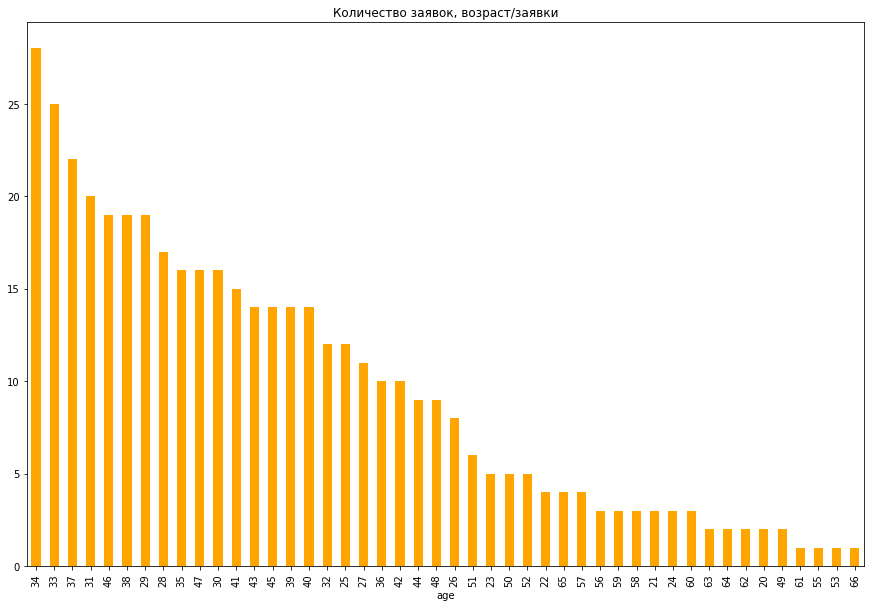

In [39]:
Flag_1.groupby([Flag_1.age])['flag'].sum().sort_values(ascending = False).plot.bar(y='age', 
                                title='Количество заявок, возраст/заявки',color = 'orange', figsize = (15,10));

In [40]:
Flag_1.groupby(['age']).sum().sort_values(by = ['flag'], ascending=False)

,spoke_with_agent,documents_send,documents_recieved,flag,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,new,old,delivery,not_stated,pickup
age,,,,,,,,,,,,,,,,
34,22,25,23,28,11737.700000,1.900000,39,1,30,5,14,19,9,6,3,19
33,20,23,22,25,12926.166667,0.333333,33,0,28,9,10,18,7,10,1,14
37,14,21,20,22,7969.166667,0.000000,25,0,20,7,10,16,6,9,0,13
31,19,20,19,20,9022.500000,0.000000,23,0,18,7,6,18,2,6,1,13
46,16,19,19,19,5284.500000,1.000000,29,1,26,3,6,17,2,6,1,12
38,19,18,18,19,8739.000000,0.500000,20,0,13,3,5,19,0,8,1,10
29,14,17,17,19,11060.000000,1.500000,22,0,20,7,14,17,2,8,1,10
28,9,14,14,17,8910.500000,0.500000,20,0,18,8,10,14,3,10,0,7
35,15,16,15,16,6855.500000,0.000000,18,0,15,4,8,14,2,5,0,11


> **_Основные покупатели - пользователи в возрасте от 28 до 47 лет_**

### **Кол-во размещенных заявок vs Кол-во покупок по возрастам пользователей**

In [41]:
dt_req1 = pd.DataFrame(filtered_df.groupby([dt.age])['request_id'].count())
dt_req1['flag'] = filtered_df.groupby([filtered_df.age])['flag'].sum()

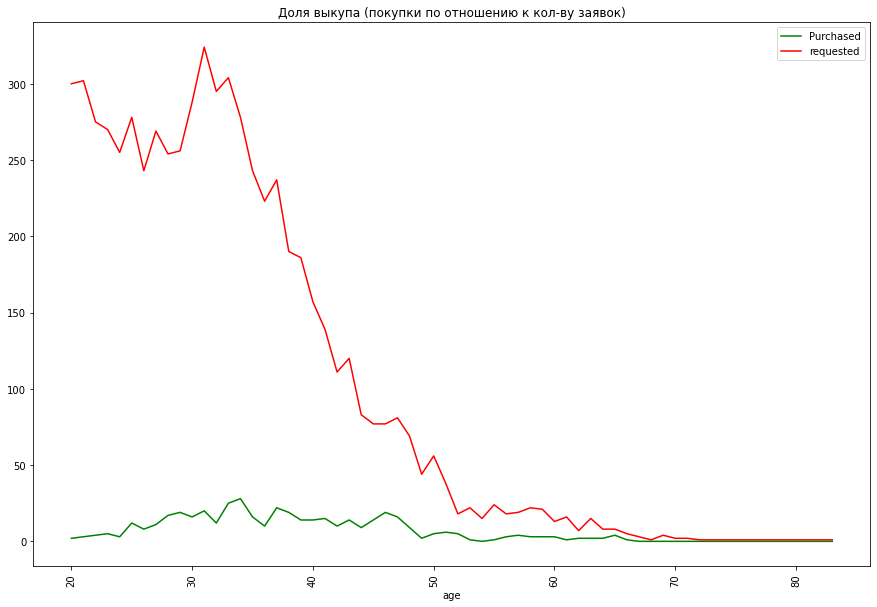

In [47]:
plt.figure(figsize = (15,10))
dt_req1.flag.plot.line(y='age', title='Доля выкупа (покупки по отношению к кол-ву заявок)', color = 'g', rot=90, label = "Purchased")
dt_req1.request_id.plot.line(y='age', title='Доля выкупа (покупки по отношению к кол-ву заявок)', color = 'r', rot=90, label ="requested")
plt.legend();

In [48]:
share = (dt_req1['flag'])/(dt_req1['request_id'])

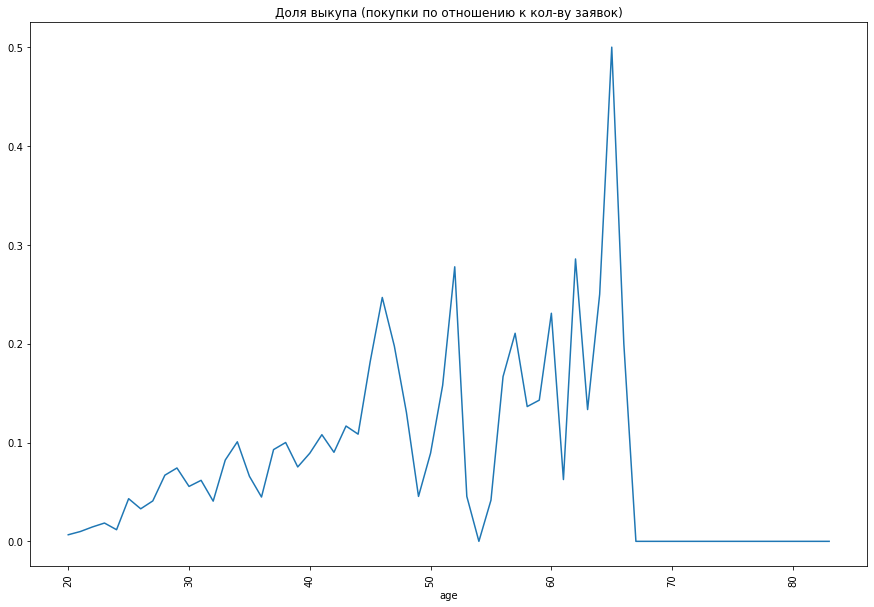

In [49]:
share.plot.line(y='age', title='Доля выкупа (покупки по отношению к кол-ву заявок)', rot=90, figsize = (15,10));

> **_Конверсия в покупку из запроса выше всего у пользователей в возрасте ок.62 лет. Но это связано с небольшим кол-вом размещенных заявок. Основными же покупателями являются пользователи в возрасте от 28 до 47 лет_**

### **Кол-во размещенных заявок vs Кол-во сессий по возрастам пользователей**

In [50]:
dt_req2 = pd.DataFrame(filtered_df.groupby([filtered_df.age])['request_id', 'sessions'].count())
#**Сессии даны в датасете в сек.**

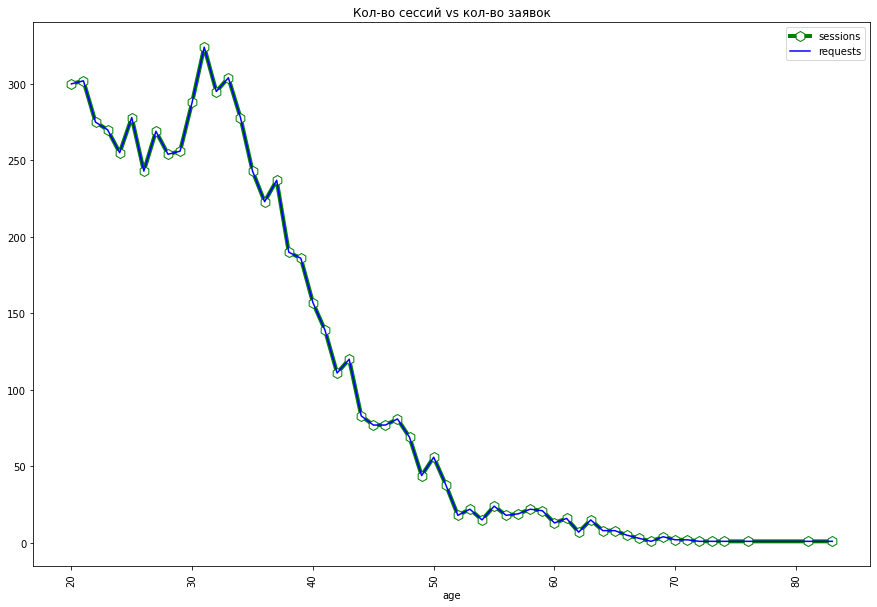

In [52]:
plt.figure(figsize = (15,10))
dt_req2.sessions.plot.line(y='age', title='Кол-во сессий vs кол-во заявок', color = 'g',
         marker='h', 
         markersize=10, linewidth=4,
         markerfacecolor='white', label = "sessions")
dt_req2.request_id.plot.line(y='age', title='Кол-во сессий vs кол-во заявок', color = 'b', rot=90, label = "requests")
plt.legend();

> **_Кол-во заявок совпадает с кол-вом сессий. т.е. заявка размещается во время каждой сессии. Возможно, стоит проверить корректность собираемых данных_**

### **Bounce_rate по возрастам пользователей**

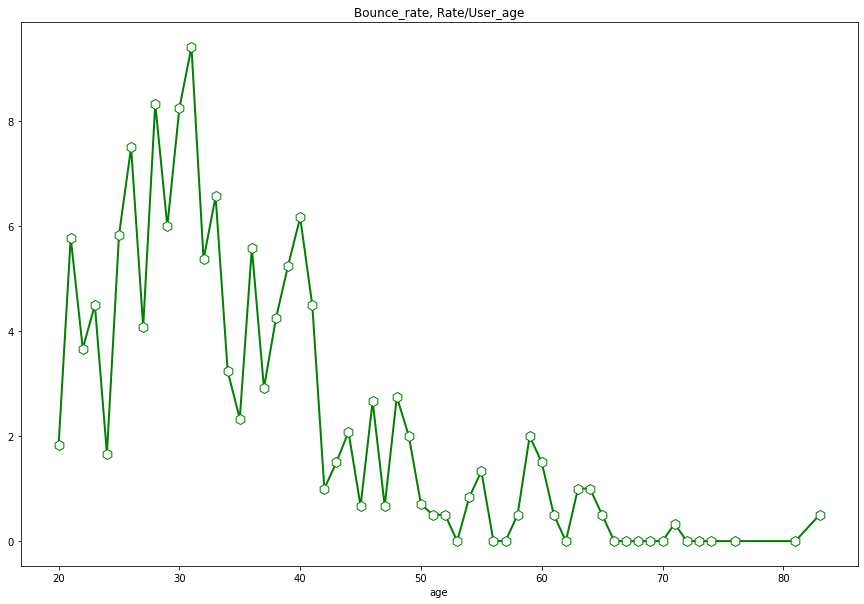

In [53]:
filtered_df.groupby([filtered_df.age])['bounce_rate'].sum().plot.line(x ='age', y= 'bounce_rate', title='Bounce_rate, Rate/User_age',color = 'g',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white', figsize=(15,10));

### **Bounce_rate по кол-ву сессий и по возрастам пользователей**

In [54]:
dt_sessions = pd.DataFrame(filtered_df.groupby([filtered_df.age])[['sessions','bounce_rate']].sum())
#dt_Int_cargo.index.set_names(['Year', 'GEO','Cargo_type'], inplace = True)
dt_sessions.sort_values(['bounce_rate'],  ascending = False).head()

,sessions,bounce_rate
age,,
31,373,9.416667
28,303,8.333333
30,343,8.250000
26,267,7.500000
33,366,6.566667


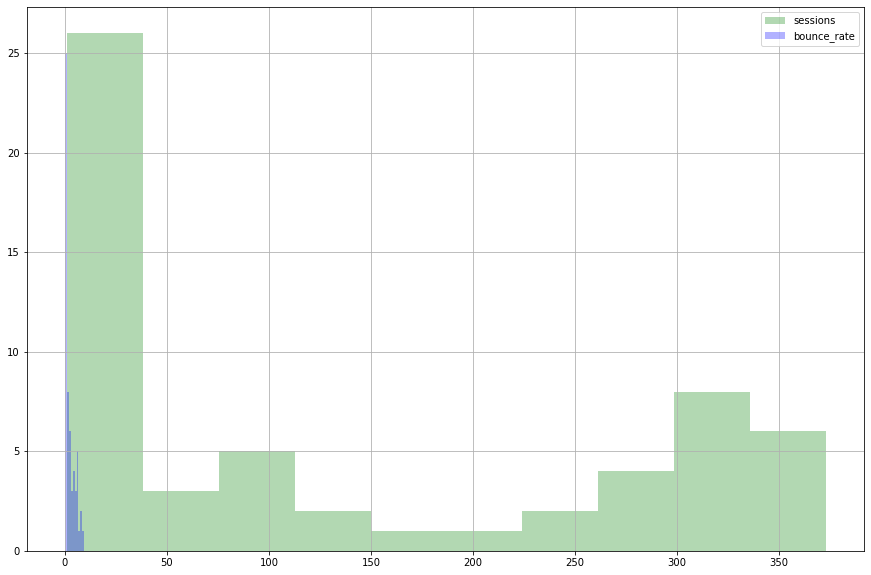

In [57]:
plt.figure(figsize = (15,10))
dt_sessions['sessions'].hist(label = 'sessions', alpha=0.3, color = 'g')
dt_sessions['bounce_rate'].hist(label = 'bounce_rate', alpha=0.3, color = 'b')
plt.legend()
      # dt_sessions[col].hist(label = 'bounce_rate', alpha=0.3, figsize=(15,10))

### **_Bounce_rate_**

In [58]:
filtered_df.groupby(['bounce_rate']).count()['request_id']

bounce_rate
0.000000    6337
0.166667       1
0.200000       3
0.250000      10
0.333333      54
0.400000       2
0.500000      93
0.666667       1
0.666667       2
0.750000       2
1.000000      66
Name: request_id, dtype: int64

## **_Корреляция признаков_** <a id="correlation"></a>

In [59]:
corr_m = dtred.corr()

In [60]:
corr_m.index.values

array(['age', 'spoke_with_agent', 'documents_send', 'documents_recieved',
       'flag', 'session_duration', 'bounce_rate', 'sessions',
       'visited_partners', 'step_1', 'step_2', 'step_3', 'new', 'old',
       'delivery', 'not_stated', 'pickup'], dtype=object)

In [61]:
corr_m

,age,spoke_with_agent,documents_send,documents_recieved,flag,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,new,old,delivery,not_stated,pickup
age,1.000000,0.107806,0.123728,0.151853,0.153577,0.049385,0.037294,0.049231,-0.015563,-0.006387,-0.004390,-0.076455,-0.032318,0.032318,-0.053667,0.029392,0.040421
spoke_with_agent,0.107806,1.000000,0.246413,0.120879,0.113213,-0.141264,0.029603,0.103708,0.015083,-0.032433,-0.128807,0.123874,-0.020908,0.020908,-0.414068,0.034545,0.389479
documents_send,0.123728,0.246413,1.000000,0.532416,0.495629,0.058966,0.004936,0.030985,0.008821,0.035508,0.103085,0.175067,-0.018541,0.018541,-0.114803,-0.009594,0.115726
documents_recieved,0.151853,0.120879,0.532416,1.000000,0.901316,0.101573,0.010386,0.017741,-0.002783,0.031130,0.164873,0.093287,-0.045057,0.045057,-0.015006,0.018317,0.007226
flag,0.153577,0.113213,0.495629,0.901316,1.000000,0.111164,0.018755,0.025818,0.001890,0.034491,0.182486,0.091897,-0.064906,0.064906,-0.011099,0.015174,0.004688
session_duration,0.049385,-0.141264,0.058966,0.101573,0.111164,1.000000,-0.129545,-0.145271,0.033648,0.058861,0.477916,0.169153,0.009103,-0.009103,0.306509,-0.099389,-0.258507
bounce_rate,0.037294,0.029603,0.004936,0.010386,0.018755,-0.129545,1.000000,0.224535,0.038590,0.026265,-0.042630,-0.090295,-0.188679,0.188679,-0.110652,0.490386,-0.090166
sessions,0.049231,0.103708,0.030985,0.017741,0.025818,-0.145271,0.224535,1.000000,0.234089,0.720725,-0.049664,-0.020940,-0.025569,0.025569,-0.158202,0.071303,0.125350
visited_partners,-0.015563,0.015083,0.008821,-0.002783,0.001890,0.033648,0.038590,0.234089,1.000000,0.135421,-0.020400,0.002179,-0.066661,0.066661,-0.074080,0.121745,0.023026
step_1,-0.006387,-0.032433,0.035508,0.031130,0.034491,0.058861,0.026265,0.720725,0.135421,1.000000,0.061252,0.204533,0.037558,-0.037558,0.152824,-0.253969,-0.046366


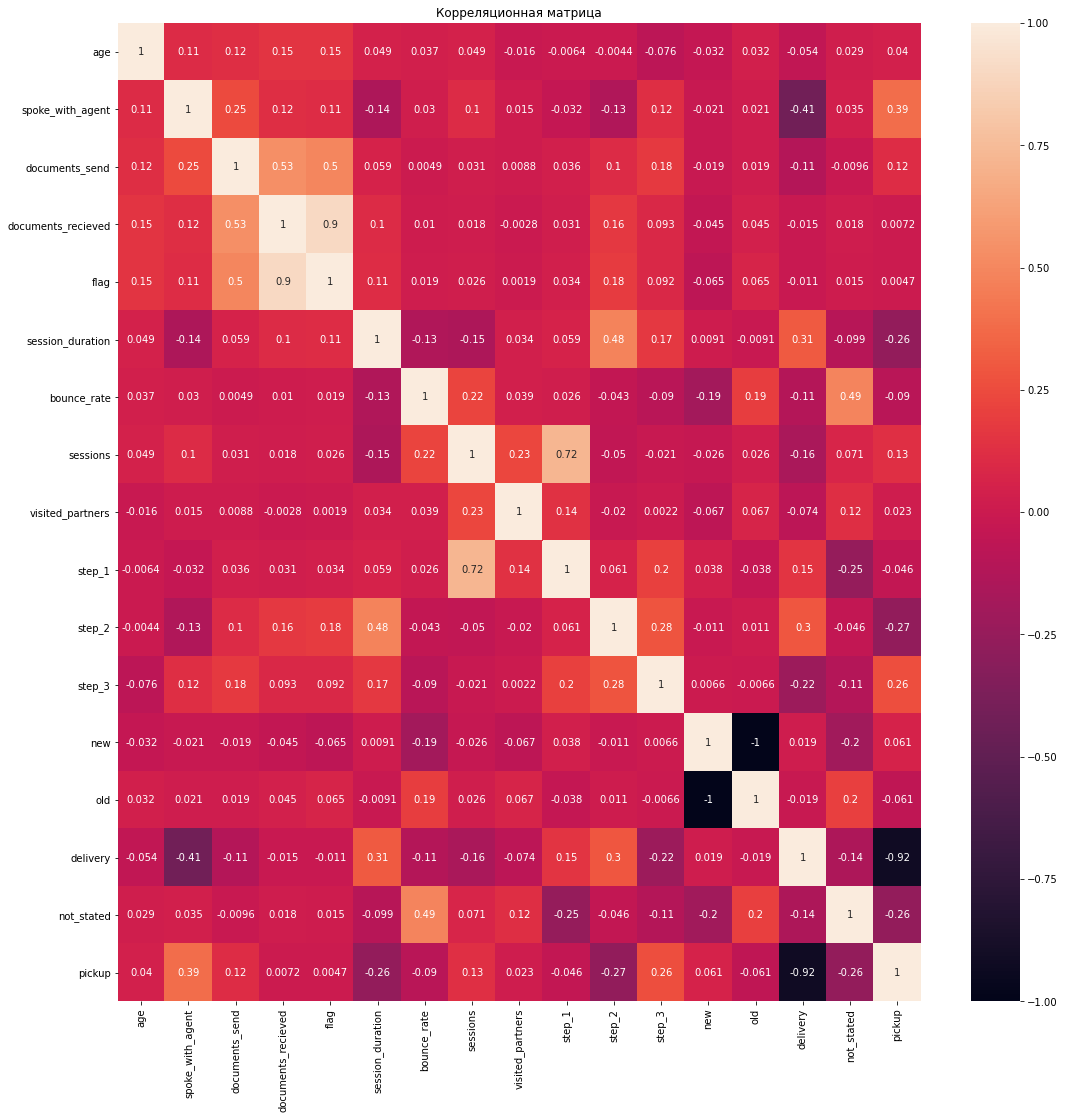

In [62]:
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

In [63]:
df = corr_m

def get_red_pair(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_largest_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_red_pair(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

corr = get_largest_correlations(df)
print(corr)

new                 old                   1.000000
documents_recieved  flag                  0.993051
delivery            pickup                0.947196
sessions            step_1                0.798820
session_duration    step_2                0.783242
documents_send      documents_recieved    0.777849
bounce_rate         not_stated            0.769645
documents_send      flag                  0.755634
spoke_with_agent    delivery              0.744401
                    pickup                0.728178
dtype: float64


> **_С целевой переменной больше всего коррелируется признаки: documents_recieved, documents_send. В данной ситуации пара "documents_recieved - flag" свидетельствует об утечке данных. При обучении модели признак documents_recieved" нужно удалить._**

In [64]:
dtred.columns.tolist()

['age',
 'spoke_with_agent',
 'documents_send',
 'documents_recieved',
 'flag',
 'session_duration',
 'bounce_rate',
 'sessions',
 'visited_partners',
 'step_1',
 'step_2',
 'step_3',
 'new',
 'old',
 'delivery',
 'not_stated',
 'pickup']

## **_Уберем выбросы_** <a id="outlier"></a>

In [65]:
dtred1 = dtred.loc[(dtred['age'] < 60)]

In [66]:
dtred1['age'].value_counts().sort_index(ascending=True)

20    300
21    302
22    275
23    270
24    255
25    278
26    243
27    269
28    254
29    256
30    288
31    324
32    295
33    304
34    278
35    243
36    223
37    237
38    190
39    186
40    157
41    139
42    111
43    120
44     83
45     77
46     77
47     81
48     69
49     44
50     56
51     38
52     18
53     22
54     15
55     24
56     18
57     19
58     22
59     21
Name: age, dtype: int64

In [67]:
dtred1['age'].value_counts().sort_values(ascending=False)

31    324
33    304
21    302
20    300
32    295
30    288
25    278
34    278
22    275
23    270
27    269
29    256
24    255
28    254
35    243
26    243
37    237
36    223
38    190
39    186
40    157
41    139
43    120
42    111
44     83
47     81
46     77
45     77
48     69
50     56
49     44
51     38
55     24
53     22
58     22
59     21
57     19
52     18
56     18
54     15
Name: age, dtype: int64

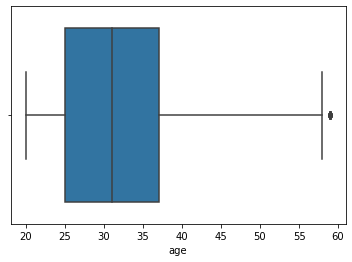

In [68]:
sns.boxplot(dtred1['age'], width = 0.8, whis = 1.8);

In [69]:
dtred1.describe()

,age,spoke_with_agent,documents_send,documents_recieved,flag,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,new,old,delivery,not_stated,pickup
count,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000,6481.000000
mean,32.168493,0.640025,0.197809,0.064651,0.064651,278.574813,0.020480,1.189477,0.017436,0.914982,0.063570,0.264002,0.893998,0.106002,0.332048,0.038266,0.629687
std,8.498094,0.480030,0.398378,0.245927,0.245927,309.945419,0.119135,0.528701,0.130898,0.726287,0.244005,0.441884,0.307864,0.307864,0.470984,0.191852,0.482926
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,0.000000,172.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,37.000000,1.000000,0.000000,0.000000,0.000000,338.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,59.000000,1.000000,1.000000,1.000000,1.000000,3364.000000,1.000000,7.000000,1.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


>> Ррешила оставить данные по 59 лет, иначе остается маленькая выборка

## **_Целевая переменная несбалансированная. Буду использовать OverSampler_** <a id="oversampler"></a>

In [70]:
X = dtred1.drop(columns = ['flag', 'documents_recieved'], axis = 1)
y = dtred1['flag']

In [71]:
# Раскомментируйте код ниже, чтобы установить библиотеку imblearn
#!pip install imbalanced-learn

In [72]:
import imblearn

In [73]:
#import plotly.express as px
from collections import Counter


cnt = Counter(y)

#px.bar(x = list(cnt.keys()), y = list(cnt.values()))

In [74]:
from imblearn.over_sampling import RandomOverSampler

#создаем RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y) #новое распределение классов (количество наблюдений в данных при этом увеличится в разы)

print (Counter(y_ros))

Counter({0: 6062, 1: 6062})


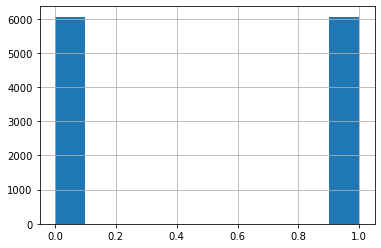

In [75]:
y_ros.hist();

## **_Обучение моделей_** <a id="ML"></a>

**_Т.к. Целевая переменная - бинарная, выберем модели классификации: Логистическую регрессию и Решающее дерево_**

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

In [77]:
X_train, X_valid, y_train, y_valid  = train_test_split(X_train, y_train, random_state = 12345, test_size = 0.2)

In [78]:
print("Размерность тренировочной выборки:", X_train.shape)
print("Размерность тренировочной выборки:", X_valid.shape)
print("Размерность тестовой выборки:", X_test.shape)

Размерность тренировочной выборки: (4147, 15)
Размерность тренировочной выборки: (1037, 15)
Размерность тестовой выборки: (1297, 15)


In [79]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train) # scaling тренировочной части тренировочных данных (train_data)
X_valid_sc = sc.transform(X_valid) # scaling валидационной части тренировочных данных (train_data)
X_test_sc = sc.transform(X_test) # scaling тестовых данных 

In [80]:
X_train_sc = pd.DataFrame(X_train_sc, columns = X.columns.tolist())
X_valid_sc = pd.DataFrame(X_valid_sc, columns = X.columns.tolist())
X_test_sc = pd.DataFrame(X_test_sc, columns = X.columns.tolist())

## **_LogisticRegression_** <a id="LR"></a>

In [81]:
from sklearn.model_selection import cross_validate,  cross_val_score

In [82]:
scorer = make_scorer(roc_auc_score, needs_proba = True)

In [83]:
parameters = {'penalty':('l1', 'l2'),
             'class_weight':[True,False],
             'max_iter': range (1,1000,10),
             'C':[1,0.5,0.2]
             }

# модель
model = LogisticRegression()
# поиск по сетке (n_jobs - кол-во ядер (т.е. мощность, с которой работает))
clf = RandomizedSearchCV(model, param_distributions = parameters, n_iter = 20, verbose = 1, 
                         scoring = scorer, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

print("Лучшая комбинация гиперпараметров", clf.best_params_, clf.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшая комбинация гиперпараметров {'penalty': 'l2', 'max_iter': 881, 'class_weight': True, 'C': 0.2} 0.9354044068774783


In [84]:
log_reg = LogisticRegression(C = 0.2, random_state = 12345, max_iter = 881, penalty = 'l2', class_weight = True)

In [85]:
log_reg.fit(X_train_sc, y_train)

LogisticRegression(C=0.2, class_weight=True, max_iter=881, random_state=12345)

In [86]:
cv_lreg = cross_val_score(log_reg, X_train_sc, y_train, cv = 5, scoring = scorer)

In [87]:
cv_lreg.mean()

0.9346325062332415

In [88]:
log_reg.coef_

array([[ 0.4316385 ,  0.29789977,  1.61420541,  0.14970458, -0.00195448,
         0.0970562 ,  0.04102659, -0.01134229,  0.47470867, -0.03149799,
        -0.09596489,  0.09596489, -0.11344142,  0.06873444,  0.08354601]])

In [89]:
a = pd.DataFrame(log_reg.coef_.T, index = list(X)).sort_values(0, ascending = False)
a

,0
documents_send,1.614205
step_2,0.474709
age,0.431638
spoke_with_agent,0.297900
session_duration,0.149705
sessions,0.097056
old,0.095965
pickup,0.083546
not_stated,0.068734
visited_partners,0.041027


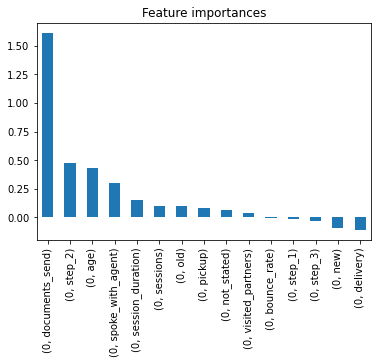

In [90]:
a.unstack().plot.bar(y=0, title='Feature importances', rot=90);

In [91]:
cv_log_reg = cross_validate(log_reg, X, y, cv = 5, scoring = 'roc_auc')
ras = roc_auc_score(y_valid, log_reg.predict_log_proba(X_valid_sc)[:,1])
print("Результаты Логистической регрессии:", sum(cv_log_reg['test_score']) / len(cv_log_reg['test_score']), '\n',
     "Roc_auc_score: ", ras)

Результаты Логистической регрессии: 0.9488144920592353 
 Roc_auc_score:  0.9444387581030365


In [92]:
log_reg_pred = log_reg.predict(X_valid_sc)
print(log_reg_pred)

[0 0 0 ... 0 0 0]


In [93]:
a=pd.DataFrame({'pred': log_reg_pred, 'test':y_valid})
a

,pred,test
125,0,0
1691,0,0
863,0,0
3715,0,0
6425,0,0
...,...,...
7289,0,0
73,0,0
7410,0,0
3282,0,0


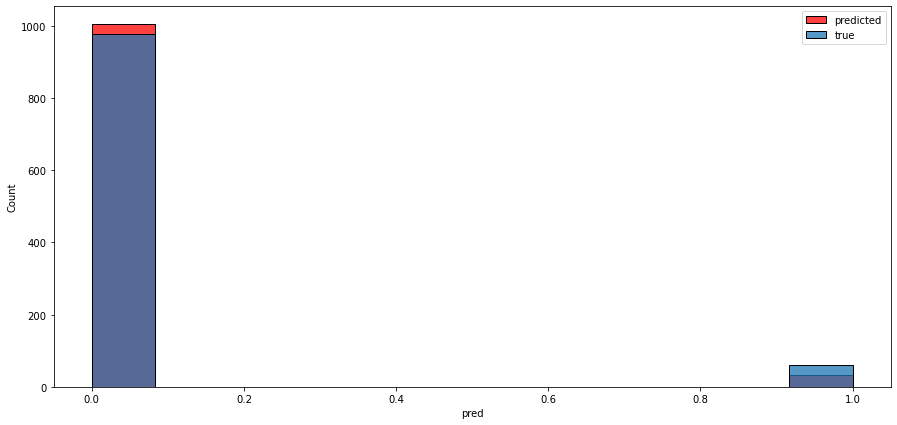

In [94]:
plt.figure(figsize = (15,7))
sns.histplot(pd.DataFrame({'pred': log_reg_pred, 'test':y_valid})['pred'], color = 'red', label = 'predicted')
sns.histplot(pd.DataFrame({'pred': log_reg_pred, 'test':y_valid})['test'], label = 'true')
plt.legend()
plt.show()

## **_Decision Tree Classifier_** <a id = "dtc"></a>

In [95]:
scorer = make_scorer(roc_auc_score, needs_proba = True)

In [96]:
params = {
    'max_depth': range (1,50) 
}

In [97]:
dec_tree = DecisionTreeClassifier(random_state = 12345)

In [98]:
rscv = RandomizedSearchCV(dec_tree, param_distributions=params, cv = 5, n_iter = 50, n_jobs = -1, verbose = 2, 
                         scoring = scorer)

In [99]:
rscv.fit(X_train_sc, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 50)},
                   scoring=make_scorer(roc_auc_score, needs_proba=True),
                   verbose=2)

In [100]:
rscv.best_params_, rscv.best_estimator_

({'max_depth': 3}, DecisionTreeClassifier(max_depth=3, random_state=12345))

In [101]:
rscv.best_score_

0.91319157369491

In [102]:
model_DT = DecisionTreeClassifier(criterion='entropy', random_state=12345, max_depth = 3) 
model_DT.fit(X_train_sc, y_train)

dct_pred = model_DT.predict(X_valid_sc)

In [103]:
model_DT.feature_importances_

array([0.06248048, 0.        , 0.86314127, 0.00677158, 0.        ,
       0.        , 0.        , 0.        , 0.05981298, 0.        ,
       0.        , 0.0077937 , 0.        , 0.        , 0.        ])

In [104]:
b = pd.DataFrame(model_DT.feature_importances_.T, index = list(X)).sort_values(0, ascending = False)
b

,0
documents_send,0.863141
age,0.062480
step_2,0.059813
old,0.007794
session_duration,0.006772
spoke_with_agent,0.000000
bounce_rate,0.000000
sessions,0.000000
visited_partners,0.000000
step_1,0.000000


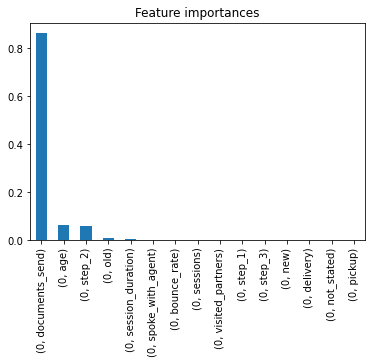

In [105]:
b.unstack().plot.bar('feature_importances', title='Feature importances', rot=90);

In [106]:
# Решающее дерево
cv_model_DT = cross_validate(model_DT, X, y, cv = 5, scoring = 'roc_auc')
cv_DT = cross_val_score(model_DT, X_train_sc, y_train, cv = 5, scoring = scorer)
cv_m = cv_DT.mean()
ras_dt = roc_auc_score(y_valid, model_DT.predict_proba(X_valid_sc)[:,1])
print("Результаты решающего дерева:", sum(cv_model_DT['test_score']) / len(cv_model_DT['test_score']),'\n',
      "CV.mean: ", cv_m, '\n',
     "Roc_auc_score: ", ras_dt)

Результаты решающего дерева: 0.9242346950259911 
 CV.mean:  0.9140138103992193 
 Roc_auc_score:  0.940702831798021


In [107]:
dct_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

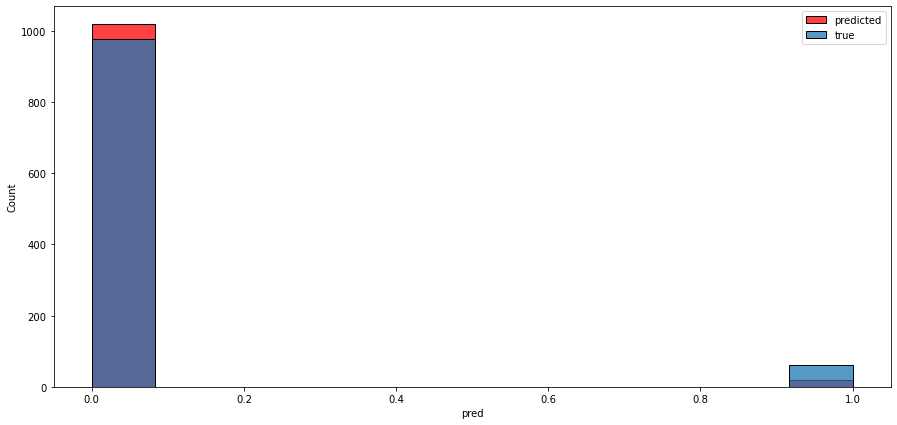

In [108]:
plt.figure(figsize = (15,7))
sns.histplot(pd.DataFrame({'pred': dct_pred, 'test':y_valid})['pred'], color = 'red', label = 'predicted')
sns.histplot(pd.DataFrame({'pred': dct_pred, 'test':y_valid})['test'], label = 'true')
plt.legend()
plt.show()

>>  **_Логистическая регрессия лучше подходит для данного датасета_**

### Предсказание на Логистической регрессии

In [109]:
pred_logreg_test = log_reg.predict(X_test_sc)
print(pred_logreg_test)

[0 0 0 ... 0 0 0]


In [110]:
a=pd.DataFrame({'pred': pred_logreg_test, 'test':y_test})
a

,pred,test
6987,0,0
1610,0,0
5337,0,0
5291,0,0
5547,0,0
...,...,...
329,0,0
6846,0,0
8294,0,1
468,0,0


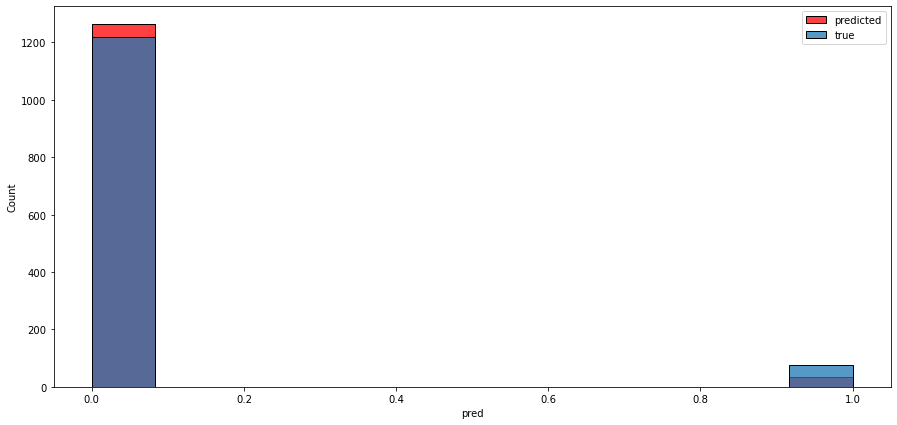

In [111]:
plt.figure(figsize = (15,7))
sns.histplot(pd.DataFrame({'pred': pred_logreg_test, 'test':y_test})['pred'], color = 'red', label = 'predicted')
sns.histplot(pd.DataFrame({'pred': pred_logreg_test, 'test':y_test})['test'], label = 'true')
plt.legend()
plt.show()

In [112]:
X_test_pred = pd.concat([X_test, a['pred'], y_test], axis = 1)
X_test_pred 

,age,spoke_with_agent,documents_send,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,new,old,delivery,not_stated,pickup,pred,flag
6987,30,0,0,975.000000,0.0,1,0,1,1,1,1,0,1,0,0,0,0
1610,24,1,0,101.000000,0.0,1,0,1,0,1,1,0,0,0,1,0,0
5337,47,0,0,1052.000000,0.0,1,0,1,0,0,1,0,1,0,0,0,0
5291,25,0,0,181.000000,0.0,1,0,1,0,0,0,1,1,0,0,0,0
5547,21,0,0,261.000000,0.0,1,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,24,1,0,73.666667,0.0,3,0,3,0,0,1,0,0,0,1,0,0
6846,31,1,0,420.000000,0.0,1,0,1,0,1,1,0,0,0,1,0,0
8294,26,0,1,1052.000000,0.0,1,0,1,1,1,1,0,1,0,0,0,1
468,26,1,0,96.500000,0.0,2,1,0,0,0,0,1,0,1,0,0,0


## **_Выводы и Конверсии_** <a id="summary"></a>

In [113]:
print('Конверсия из сессий в заявки (%): ', ((filtered_df['request_id'].count())/(filtered_df['sessions'].count())*100))

Конверсия из сессий в заявки (%):  100.0


> 100%-ая конверсия из сессий в заявку - это хорошо, но стоит проверить насколько верно собирается информация. 

In [114]:
print('Конверсия из заявок в регистрацию (step_1) (%): ', ((filtered_df['step_1'].sum())/(filtered_df['request_id'].count())*100))

Конверсия из заявок в регистрацию (step_1) (%):  91.23421092679958


In [115]:
print('Конверсия из (step_1) в documents_send (%): ', ((filtered_df['documents_send'].sum())/(filtered_df['step_1'].sum())*100))

Конверсия из (step_1) в documents_send (%):  21.88490408673895


In [116]:
print('Конверсия из documents_send в documents_recieved (%):', ((filtered_df['documents_recieved'].sum())/
                                                                (filtered_df['documents_send'].sum())*100))

Конверсия из documents_send в documents_recieved (%): 33.079268292682926


> Желательно проверить почему не все отправленные документы переходят в статус "Получены"

In [117]:
print('Конверсия из заявок в покупку (%):', ((filtered_df['flag'].sum())/(filtered_df['request_id'].count())*100))

Конверсия из заявок в покупку (%): 6.604778572515599


In [118]:
print('Конверсия из регистрации в покупку (%):', ((filtered_df['flag'].sum())/(filtered_df['step_1'].sum())*100))

Конверсия из регистрации в покупку (%): 7.239366138448708


In [119]:
print('Конверсия из documents_recieved в Покупку (%):', ((filtered_df['flag'].sum())/
                                                         (filtered_df['documents_recieved'].sum())*100))

Конверсия из documents_recieved в Покупку (%): 100.0


In [120]:
print('Конверсия из documents_send в Покупку (%):', ((filtered_df['flag'].sum())/(filtered_df['documents_send'].sum())*100))

Конверсия из documents_send в Покупку (%): 33.079268292682926


In [121]:
print('Доля New среди купивших:',((filtered_df[(filtered_df['new']==1)&(filtered_df['flag']==1)]['new'].sum())/(filtered_df['new'].sum())*100),
      '\n','Доля Old среди купивших:', ((filtered_df[(filtered_df['old']==1)&(filtered_df['flag']==1)]['old'].sum())/(filtered_df['old'].sum())*100))

Доля New среди купивших: 6.047700170357751 
 Доля Old среди купивших: 11.269614835948644


**1. Большинство пользователей, совершивших покупку, входят в возрастную группу от 30 до 45 лет. Не совершивших покупку - от 20 до 40 лет;**

**2. Большинство клиентов, совершивших покупку, разговаривали с агентом;**

**3. В основном клиенты совершают покупку уже во время первой сессии;**

**4. Большинство купивших распределяются между теми, кто прошел регистрацию (step_1), и теми, кто не регистрировался;**

**5. Конверсия в покупку выше у пользователей со статус Old;**

**6. Больше всего сессий приходится на пользователей в возрасте от 30 до 33 лет. На группу от 20 до 40 лет: от 200 до 373 сессий;**

**7. Самые продолжительные, как и самые короткие сессии у пользователей старшего возраста. Возможно, на сайте мелкий шрифт, сложное меню, не увеличиваются фото. Средняя же продолжительность сессий - ок.320 сек.;**

**8. Больше всего заявок размещают пользователи в возрасте от 30 до 33 лет. На группу от 20 до 40 лет: от 200 до 324 заявок;**

**9. Основная группа покупателей в возврасте от 30 до 40 лет, больше всего - 34 года;**

**10. Конверсия из заявок в покупку выше всего у пользователей 62 года, но это связано с маленьким кол-вом заявок.;**

**11. Bounce_rate невысокий, у 90% пользователей Bounce_rate = 0;**

**12. Признаки с высокой корреляцией:**
<br>new         /         old                   1.000000
<br>documents_recieved  / flag                  0.993051 <font color = "red"> => data leakage</font>
<br>delivery           /  pickup                0.947196
<br>sessions           /  step_1                0.798820
<br>session_duration   /  step_2                0.783242
<br>documents_send      / documents_recieved    0.777849
<br>bounce_rate        /  not_stated            0.769645
<br>documents_send      / flag                  0.755634
<br>spoke_with_agent   /  delivery              0.744401
<br>                   /  pickup                0.728178

**13. Признаки с высокой корреляицей с покупкой:**
<br>documents_recieved  / flag                  0.993051 <font color = "red"> => data leakage</font>
<br>documents_send      / flag                  0.755634
                    
**14. По данным модели Логистической регрессии, основные парметры, положительно влияющие на совершение покупки:**
<br>documents_recieved	5.483082 <font color = "red"> => data leakage</font>
<br>documents_send	1.530057
<br>step_2	1.22829


## **_Комментарии_** <a id="comments"></a>

1. Ввиду сильной разницы в кол-ве между двумя пказателями ЦУ был использован OverSampler
2. Стоит проверить корректность сбора /внесения данных: есть request_id, которым присвоены статусы как old, так и new
3. Проверить данные в step_1: есть значения = 2. Получается, что пользователь регистрировался дважды. 
4. Есть выбросы в данных: из датасеты, использовавшегося для ML, удалила пользователей достигших 60 лет. Таких пользователей мало, и мало активностей.